# BITS F464 - Machine Learning
## Assignment 1
Pathuri Charith Goud - 2020A1PS2412H
<br>
Sharan K - 2021A8PS1537H
<br>
Abhinav Sudhakar- 2019AAPS1227H


In [3078]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math

### Dataset Preprocessing

In [3079]:
df = pd.read_csv("Data Set for Assignment 1.csv", index_col="id")
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_mean  symmetry_mean  ...  radius_worst  \
id                                            ...                 
842302                0.14710         0.2419  ...         25.38   
842517                0.07017         0.1812  ...         24.99   
84300903              0.12790         0.2069  ...         23.57   
84348301              0.10520         0.2597  ...         14.91   
84358402              0.10430         0.1809  ...         22.54   

          texture_worst  perimeter_worst  area_worst  smoothness_worst  \
id                                                                       
842302            17.33           184.60      2019.0            0.1622   
842517            23.41           158.80      1956.0            0.1238   
84300903          25.53           152.50      1709.0            0.1444   
84348301          26.50            98.87       567.7            0.2098   
84358402          16.67           152.20      1575.0            0.1374   

          compactness_worst  concavity_worst  concave points_worst  \
id                                                                   
842302               0.6656           0.7119                0.2654   
842517               0.1866           0.2416                0.1860   
84300903             0.4245           0.4504                0.2430   
84348301             0.8663           0.6869                0.2575   
84358402             0.2050           0.4000                0.1625   

          symmetry_worst  fractal_dimension_worst  
id                                                 
842302            0.4601                  0.11890  
842517            0.2750                  0.08902  
84300903          0.3613                  0.08758  
84348301          0.6638                  0.17300  
84358402          0.2364                  0.07678  

[5 rows x 31 columns]

In [3080]:
training_dfs = []
testing_dfs = []

num_datasets = 10

In [3081]:
# Spliting the dataset into Training and Testing data
for i in range(num_datasets):    
    training_dfs.append(df.sample(frac=0.67, random_state=i))
    testing_dfs.append(df[~df.index.isin(training_dfs[i].index)])

### Plotting the Accuracies

In [3082]:
def plot_graph(title, x_label, y_label, accuracy_models_list, labels, x_axis_list):
    for i, accuracy_model in enumerate(accuracy_models_list):
        plt.plot(x_axis_list, accuracy_model, label=labels[i])
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    plt.legend()

    plt.show()

##### Feature Engineering Task 1
For some of the data points, one or more feature values are missing in the data set. You need to fill in those values so that the data tuple can be made use of in building the model as well as testing the model. You should impute the missing value with the most frequent value in the case of categorical feature and impute missing value with the average of the existing values of the corresponding feature if the feature takes continuous numerical values.

In [3083]:
def fill_missing_values(training_df, testing_df):
    for column in training_df.columns: 
        if training_df[column].dtype == "object": # Categorical Data
            max_frequency_category = training_df[column].mode()[0]
            training_df[column].fillna(max_frequency_category, inplace=True)
            testing_df[column].fillna(max_frequency_category, inplace=True)
        else: # Continuous Data
            mean_value = training_df[column].mean()
            training_df[column].fillna(mean_value, inplace=True)
            testing_df[column].fillna(mean_value, inplace=True)

    return (training_df, testing_df)

##### Feature Engineering Task 2 
You should perform typical normalization of each feature by making use of the following formula: (X’ = (X - µ) / σ where µ represents the mean of feature value, and σ represents the standard deviation of feature values).

In [3084]:
def normalize_data(training_df, testing_df):
    for column in training_df.columns:
        if training_df[column].dtype != "object":
            mean_value = training_df[column].mean()
            std_dev = training_df[column].std()

            training_df[column] = (training_df[column] - mean_value)/std_dev
            testing_df[column] = (testing_df[column] - mean_value)/std_dev
    
    return (training_df, testing_df)

##### Dropping Columns with No Value

In [3085]:
def drop_rows_with_no_values(dataframe):
    cleaned_dataframe = dataframe.dropna()
    return cleaned_dataframe

### Part A - Perceptron Learning Algorithm

In [3086]:
def perceptron_train(training_df):
    training_y = training_df["diagnosis"]
    training_x = training_df.drop("diagnosis", axis=1)

    num_datapoints = training_x.shape[0]
    num_features = training_x.shape[1]

    w = np.zeros([1, num_features], dtype=float)

    max_iterations = 5000

    correct_class_count = 0
    datapoint_index = 0

    mapping = {"B": 1, "M": -1}
    training_y = training_y.map(mapping)

    for i in range(max_iterations):
        data_point = training_x.iloc[datapoint_index, :].values.reshape(-1,1)
        true_class = training_y.iloc[datapoint_index]
        
        classification = w.dot(data_point)

        if true_class*classification <= 0:
            correct_class_count = 0
            w = w + true_class*data_point.T
        else:
            correct_class_count += 1

        if correct_class_count == num_datapoints:
            break

        datapoint_index = (datapoint_index+1)%num_datapoints

    return w

In [3087]:
def perceptron_accuracy(w, dataframe) :
    y = dataframe["diagnosis"]
    x = dataframe.drop("diagnosis", axis=1)

    mapping = {"B": 1, "M": -1}
    y = y.map(mapping)

    num_datapoints = x.shape[0]
    num_features = x.shape[1]

    misclassification_count = 0

    for i in range(num_datapoints):
        data_point = x.iloc[i, :].values.reshape(-1,1)
        true_class = y.iloc[i]

        classification = w.dot(data_point)

        if true_class*classification <= 0:
            misclassification_count += 1

    return (1 - (misclassification_count/num_datapoints))


In [3088]:
def perceptron_metrics(w, dataframe) :
    y = dataframe["diagnosis"]
    x = dataframe.drop("diagnosis", axis=1)

    mapping = {"B": 1, "M": -1}
    y = y.map(mapping)

    num_datapoints = x.shape[0]
    num_features = x.shape[1]

    true_pos = 0
    false_pos = 0
    true_neg = 0
    false_neg = 0

    for i in range(num_datapoints):
        data_point = x.iloc[i, :].values.reshape(-1,1)
        true_class = y.iloc[i]

        classification = w.dot(data_point)

        if classification >= 0:
            if true_class == 1:
                true_pos += 1
            else:
                false_pos += 1
        else:
            if true_class == 1:
                false_neg += 1
            else:
                true_neg += 1
    if true_pos != 0:
        recall = true_pos/(true_pos + false_neg)
        precision = true_pos/(true_pos + false_pos)
    else:
        recall = true_neg/(true_neg + false_pos)
        precision = true_neg/(true_neg + false_neg)

    return (recall, precision)

#### Learning Task 1
Build a classifier (Perceptron Model - PM1) using the perceptron algorithm. Figure out whether the data set is linearly separable by building the model. By changing the order of the training examples, build another classifier (PM2) and outline the differences between the models – PM1 and PM2.

In [3089]:
# The PM1 and PM2 models for various splits
PM1 = []
PM2 = []

In [3090]:
# For PM1

for i in range(num_datasets):
    cleaned_training_df = drop_rows_with_no_values(training_dfs[i].copy())
    PM1.append(perceptron_train(cleaned_training_df))


In [3091]:
# For PM2

for i in range(num_datasets):
    shuffled_training_df = training_dfs[i].copy().sample(frac=1, random_state=57)
    shuffled_training_df = drop_rows_with_no_values(shuffled_training_df)
    PM2.append(perceptron_train(shuffled_training_df))

The difference between the models PM1 and PM2 can be seen from the following differences in accuracy of classification:

In [3092]:
PM1_training_accuracy = []
PM1_testing_accuracy = []

PM2_training_accuracy = []
PM2_testing_accuracy = []

PM1_training_metrics = []
PM1_testing_metrics = []

PM2_training_metrics = []
PM2_testing_metrics = []

In [3093]:
for i in range(num_datasets):
    cleaned_training_df = drop_rows_with_no_values(training_dfs[i].copy())
    cleaned_testing_df = drop_rows_with_no_values(testing_dfs[i].copy())

    shuffled_training_df = training_dfs[i].copy().sample(frac=1, random_state=57)
    shuffled_training_df = drop_rows_with_no_values(shuffled_training_df)

    PM1_training_accuracy.append(perceptron_accuracy(PM1[i], cleaned_training_df))
    PM2_training_accuracy.append(perceptron_accuracy(PM2[i], shuffled_training_df))

    PM1_testing_accuracy.append(perceptron_accuracy(PM1[i], cleaned_testing_df))
    PM2_testing_accuracy.append(perceptron_accuracy(PM2[i], cleaned_testing_df))

    PM1_training_metrics.append(perceptron_metrics(PM1[i], cleaned_training_df))
    PM2_training_metrics.append(perceptron_metrics(PM2[i], shuffled_training_df))

    PM1_testing_metrics.append(perceptron_metrics(PM1[i], cleaned_testing_df))
    PM2_testing_metrics.append(perceptron_metrics(PM2[i], cleaned_testing_df))

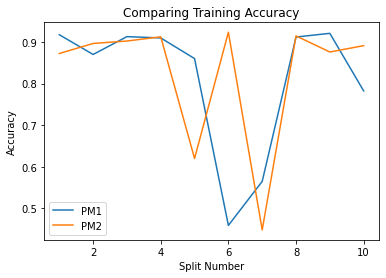

In [3094]:
x_axis_value = range(1, num_datasets+1)
plot_graph("Comparing Training Accuracy", "Split Number", "Accuracy", [PM1_training_accuracy, PM2_training_accuracy], ["PM1", "PM2"], x_axis_value)

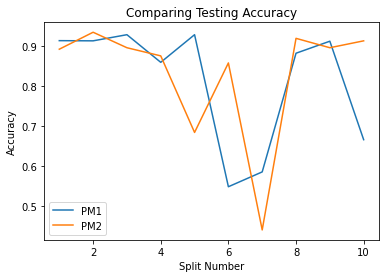

In [3095]:
plot_graph("Comparing Testing Accuracy", "Split Number", "Accuracy", [PM1_testing_accuracy, PM2_testing_accuracy], ["PM1", "PM2"], x_axis_value)

#### Learning Task 2
Build a classifier (Perceptron Model - PM3) using the perceptron algorithm on the normalized data and figure out the difference between the two classifiers (PM1 and PM3).

In [3096]:
# The PM3 models for various splits
PM3 = []

normalized_training_dfs = []
normalized_testing_dfs = []

In [3097]:
for i in range(num_datasets):
    cleaned_training_df = drop_rows_with_no_values(training_dfs[i].copy())
    cleaned_testing_df = drop_rows_with_no_values(testing_dfs[i].copy())
    normalized_training_df, normalized_testing_df = normalize_data(cleaned_training_df, cleaned_testing_df)

    normalized_training_dfs.append(normalized_training_df)
    normalized_testing_dfs.append(normalized_testing_df)

    PM3.append(perceptron_train(normalized_training_df.copy()))

The differences between PM1 and PM3 can be seen from the following differences in the accuracy in training classification and testing classification

In [3098]:
PM3_training_accuracy = []
PM3_testing_accuracy = []

PM3_training_metrics = []
PM3_testing_metrics = []

In [3099]:
for i in range(num_datasets):
    cleaned_training_df = drop_rows_with_no_values(normalized_training_dfs[i].copy())
    cleaned_testing_df = drop_rows_with_no_values(normalized_testing_dfs[i].copy())

    PM3_training_accuracy.append(perceptron_accuracy(PM3[i], cleaned_training_df))
    PM3_testing_accuracy.append(perceptron_accuracy(PM3[i], cleaned_testing_df))

    PM3_training_metrics.append(perceptron_metrics(PM3[i], cleaned_training_df))
    PM3_testing_metrics.append(perceptron_metrics(PM3[i], cleaned_testing_df))

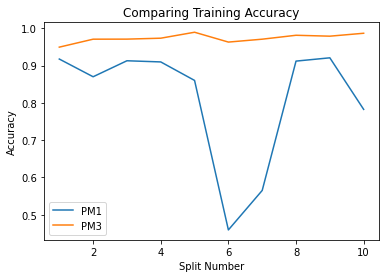

In [3100]:
plot_graph("Comparing Training Accuracy", "Split Number", "Accuracy", [PM1_training_accuracy, PM3_training_accuracy], ["PM1", "PM3"], x_axis_value)

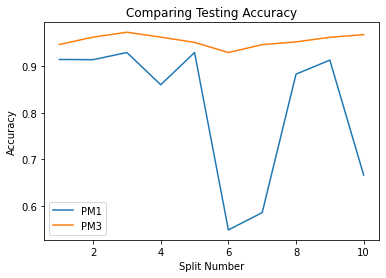

In [3101]:
plot_graph("Comparing Testing Accuracy", "Split Number", "Accuracy", [PM1_testing_accuracy, PM3_testing_accuracy], ["PM1", "PM3"], x_axis_value)

#### Learning Task 3
Change the order of features in the dataset randomly. Equivalently speaking, for an example of feature tuple (f1, f2, f3, f4, . . , f32), consider a random permutation (f3, f1, f4, f2, f6, ….., f32) and build a classifier (Perceptron Model – PM4). Would there be any change in the model, PM4, as compared to PM1. If so, outline the differences in the models and their respective performances.

In [3102]:
# The PM4 models for various splits
PM4 = []

new_order = np.random.permutation(training_dfs[0].columns)

In [3103]:
for i in range(num_datasets):
    cleaned_training_df = drop_rows_with_no_values(training_dfs[i].copy())
    reordered_training_df = cleaned_training_df.reindex(new_order, axis=1)
    PM4.append(perceptron_train(reordered_training_df))

The differences between PM1 and PM4 can be seen from the following differences in the accuracy in training classification and testing classification

In [3104]:
PM4_training_accuracy = []
PM4_testing_accuracy = []

PM4_training_metrics = []
PM4_testing_metrics = []

In [3105]:
for i in range(num_datasets):
    cleaned_training_df = drop_rows_with_no_values(training_dfs[i].copy())
    cleaned_testing_df = drop_rows_with_no_values(testing_dfs[i].copy())

    reordered_training_df = cleaned_training_df.reindex(new_order, axis=1)
    reordered_testing_df = cleaned_testing_df.reindex(new_order, axis=1)

    PM4_training_accuracy.append(perceptron_accuracy(PM4[i], reordered_training_df))
    PM4_testing_accuracy.append(perceptron_accuracy(PM4[i], reordered_testing_df))

    PM4_training_metrics.append(perceptron_metrics(PM4[i], reordered_training_df))
    PM4_testing_metrics.append(perceptron_metrics(PM4[i], reordered_testing_df))

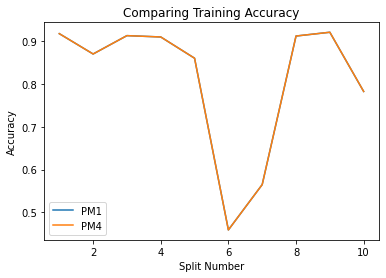

In [3106]:
plot_graph("Comparing Training Accuracy", "Split Number", "Accuracy", [PM1_training_accuracy, PM4_training_accuracy], ["PM1", "PM4"], x_axis_value)

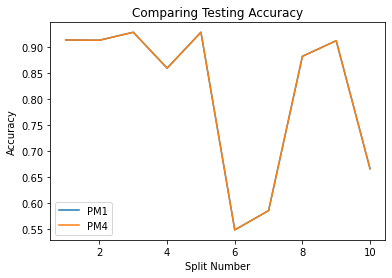

In [3107]:
plot_graph("Comparing Testing Accuracy", "Split Number", "Accuracy", [PM1_testing_accuracy, PM4_testing_accuracy], ["PM1", "PM4"], x_axis_value)

### Part B – Fisher’s Linear Discriminant Analysis

In [3108]:
def find_axis(training_df):
    grouped_df = training_df.groupby("diagnosis")

    training_df_m = grouped_df.get_group("M").drop("diagnosis", axis=1)
    training_df_b = grouped_df.get_group("B").drop("diagnosis", axis=1)

    mean_m = training_df_m.mean().values.reshape(1, -1)
    mean_b = training_df_b.mean().values.reshape(1, -1)

    covariance_m = training_df_m.cov()
    covariance_b = training_df_b.cov()

    diff_mean = (mean_m - mean_b).T

    S_w = covariance_m + covariance_b
    S_b = diff_mean.dot(diff_mean.T)

    M = np.linalg.inv(S_w).dot(S_b)

    eigen_values, eigen_vectors = np.linalg.eig(M)

    index = np.argmax(eigen_values)
    eigen_value = eigen_values[index]
    eigen_vector = eigen_vectors[:,index].reshape(1, -1).real
    
    return eigen_vector

In [3109]:
def project_points(axis, dataframe):
    y = dataframe.loc[:, "diagnosis"].values
    x = dataframe.drop("diagnosis", axis=1)
    
    projected_df = axis.dot(x.T).T
    projected_df = pd.DataFrame(projected_df, columns=["projection"])
    projected_df.insert(0, "diagnosis", y)
    
    return projected_df

In [3110]:
def get_classification_point(projected_df):
    grouped_df = projected_df.groupby("diagnosis")

    projected_df_m = grouped_df.get_group("M").drop("diagnosis", axis=1)
    projected_df_b = grouped_df.get_group("B").drop("diagnosis", axis=1)

    mean_m = projected_df_m.mean().values[0]
    mean_b = projected_df_b.mean().values[0]

    var_m = projected_df_m.iloc[:,0].var()
    var_b = projected_df_b.iloc[:,0].var()

    a = ((1/(2*var_m)) - (1/(2*var_b)))
    b = -((mean_m/var_m) - (mean_b/var_b))
    c = (((mean_m**2)/(2*var_m)) - ((mean_b**2)/(2*var_b)) - (math.log(var_b/var_m)/2))

    D = math.sqrt(b**2 - 4*a*c)

    c1 = (-b + D)/(2*a)
    c2 = (-b - D)/(2*a)

    point_classification = (mean_b + mean_m)/2

    if (c1-mean_m)*(c1-mean_b) <= 0:
        point_classification = c1
    
    if (c2-mean_m)*(c2-mean_b) <= 0:
        point_classification = c2
    
    return ((mean_b-mean_m)//math.fabs(mean_b-mean_m), point_classification)

In [3111]:
def fischers_lda_accuracy(classification_point, dataframe, axis):
    dataframe = project_points(axis, dataframe)

    y = dataframe["diagnosis"]
    x = dataframe.drop("diagnosis", axis=1)

    mapping = {"B": 1, "M": -1}
    y = y.map(mapping)

    num_datapoints = x.shape[0]
    num_features = x.shape[1]

    misclassification_count = 0

    for i in range(num_datapoints):
        data_point = x.iloc[i, :].values.reshape(-1,1)
        true_class = y.iloc[i]

        classification = classification_point[0] * (data_point[0] - classification_point[1])
 
        if true_class*classification < 0:
            misclassification_count += 1

    return (1 - (misclassification_count/num_datapoints))

In [3112]:
def fischers_lda_metrics(classification_point, dataframe, axis):
    dataframe = project_points(axis, dataframe)

    y = dataframe["diagnosis"]
    x = dataframe.drop("diagnosis", axis=1)

    mapping = {"B": 1, "M": -1}
    y = y.map(mapping)

    num_datapoints = x.shape[0]
    num_features = x.shape[1]

    true_pos = 0
    true_neg = 0
    false_pos = 0
    false_neg = 0

    for i in range(num_datapoints):
        data_point = x.iloc[i, :].values.reshape(-1,1)
        true_class = y.iloc[i]

        classification = classification_point[0] * (data_point[0] - classification_point[1])
 
        if classification >= 0:
            if true_class == 1:
                true_pos += 1
            else:
                false_pos += 1
        else:
            if true_class == 1:
                false_neg += 1
            else:
                true_neg += 1

    if true_pos != 0:
        recall = true_pos/(true_pos + false_neg)
        precision = true_pos/(true_pos + false_pos)
    else:
        recall = true_neg/(true_neg + false_pos)
        precision = true_neg/(true_neg + false_neg)

    return (recall, precision)

#### Learning Task 1
Build Fisher’s linear discriminant model (FLDM1) on the training data and thus reduce 32dimensional problem to univariate dimensional problem. Find out the decision boundary in the univariate dimension using generative approach. You may assume gaussian distribution for both positive and negative classes in the univariate dimension. 

In [3113]:
# The FLDM1 models for various splits
FLDM1 = []

FLDM1_axis = []

In [3114]:
for i in range(num_datasets):
    cleaned_training_df = drop_rows_with_no_values(training_dfs[i].copy())
    FLDM1_axis.append(find_axis(cleaned_training_df).copy())
    projected_df = project_points(FLDM1_axis[i], cleaned_training_df)

    FLDM1.append(get_classification_point(projected_df))

#### Learning Task 2
Change the order of features in the dataset randomly. Equivalently speaking, for an example of feature tuple (f1, f2, f3, f4, . . , f32), consider a random permutation (f3, f1, f4, f2, f6, ….., f32) and build the Fisher’s linear discriminant model (FLDM2) on the same training data as in the learning task 1. Find out the decision boundary in the univariate dimension using generative approach and you may assume gaussian distribution for both positive and negative classes in the univariate dimension. Outline the difference between the models – FLDM1 and FLDM2 - and their respective performances.

In [3115]:
# The FLDM2 models for various splits
FLDM2 = []

FLDM2_axis = []

In [3116]:
for i in range(num_datasets):
    cleaned_training_df = drop_rows_with_no_values(training_dfs[i].copy())
    reordered_training_df = cleaned_training_df.reindex(new_order, axis=1)

    FLDM2_axis.append(find_axis(reordered_training_df).copy())
    projected_df = project_points(FLDM2_axis[i], reordered_training_df)

    FLDM2.append(get_classification_point(projected_df))

The differences between FLDM1 and FLDM2 can be seen from the following differences in the accuracy in training classification and testing classification

In [3117]:
FLDM1_training_accuracy = []
FLDM1_testing_accuracy = []

FLDM2_training_accuracy = []
FLDM2_testing_accuracy = []

FLDM1_training_metrics = []
FLDM1_testing_metrics = []

FLDM2_training_metrics = []
FLDM2_testing_metrics = []

In [3118]:
for i in range(num_datasets):
    cleaned_training_df = drop_rows_with_no_values(training_dfs[i].copy())
    cleaned_testing_df = drop_rows_with_no_values(testing_dfs[i].copy())

    reordered_training_df = cleaned_training_df.reindex(new_order, axis=1)
    reordered_testing_df = cleaned_testing_df.reindex(new_order, axis=1)

    FLDM1_training_accuracy.append(fischers_lda_accuracy(FLDM1[i], cleaned_training_df, FLDM1_axis[i]))
    FLDM2_training_accuracy.append(fischers_lda_accuracy(FLDM2[i], reordered_training_df, FLDM2_axis[i]))

    FLDM1_testing_accuracy.append(fischers_lda_accuracy(FLDM1[i], cleaned_testing_df, FLDM1_axis[i]))
    FLDM2_testing_accuracy.append(fischers_lda_accuracy(FLDM2[i], reordered_testing_df, FLDM2_axis[i]))

    FLDM1_training_metrics.append(fischers_lda_metrics(FLDM1[i], cleaned_training_df, FLDM1_axis[i]))
    FLDM2_training_metrics.append(fischers_lda_metrics(FLDM2[i], reordered_training_df, FLDM2_axis[i]))

    FLDM1_testing_metrics.append(fischers_lda_metrics(FLDM1[i], cleaned_testing_df, FLDM1_axis[i]))
    FLDM2_testing_metrics.append(fischers_lda_metrics(FLDM2[i], reordered_testing_df, FLDM2_axis[i]))

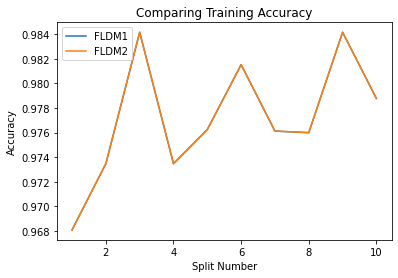

In [3119]:
plot_graph("Comparing Training Accuracy", "Split Number", "Accuracy", [FLDM1_training_accuracy, FLDM2_training_accuracy], ["FLDM1", "FLDM2"], x_axis_value)

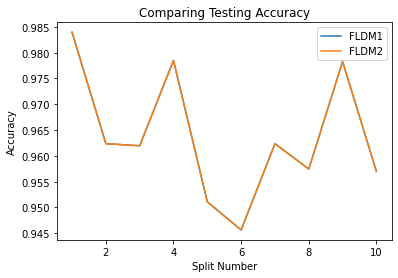

In [3120]:
plot_graph("Comparing Testing Accuracy", "Split Number", "Accuracy", [FLDM1_testing_accuracy, FLDM2_testing_accuracy], ["FLDM1", "FLDM2"], x_axis_value)

### Part C – Logistic Regression

In [3121]:
def sigmoid_value(z):
    if type(z) == np.ndarray:
        z = float(z[0])
    z = -500 if z < -500 else z
    if (1/(1 + np.exp(-z))) > 0.99999:
        return 0.99999
    return (1/(1 + np.exp(-z)))

In [3122]:
def cost_function(w, dataframe):
    t = dataframe["diagnosis"]
    x = dataframe.drop("diagnosis", axis=1)

    mapping = {"B": 0, "M": 1}
    t = t.map(mapping)
    t_1 = 1-t

    y = x.apply(lambda a: sigmoid_value(w[:,1:].dot(a) + w[0][0]), axis = 1)
    log_y = y.apply(lambda a: np.log(a))
    log_1y = y.apply(lambda a: np.log(1-a))

    cost = -(t.T.dot(log_y) + t_1.T.dot(log_1y))
    return cost

In [3123]:
def derivative_cost(w, dataframe):
    t = dataframe["diagnosis"]
    x = dataframe.drop("diagnosis", axis=1)

    mapping = {"B": 0, "M": 1}
    t = t.map(mapping)

    num_datapoints = x.shape[0]
    num_features = x.shape[1]
    
    y = x.apply(lambda a: sigmoid_value(w[:,1:].dot(a) + w[0][0]), axis = 1)
    derivative = np.zeros([1, num_features+1], dtype=float)
    
    for i, val in enumerate((y-t).T.dot(x)):
        derivative[0][i+1] = val
    
    return derivative

In [3124]:
def logistic_train(dataframe, learning_rate, epochs, batch_size):
    x = dataframe.drop("diagnosis", axis=1)

    num_datapoints = x.shape[0]
    num_features = x.shape[1]

    w = np.zeros([1, num_features+1], dtype=float)

    iteration = []
    cost = []

    for i in range(epochs):
        index = np.random.randint(0, num_datapoints+1-batch_size)
        batch = dataframe.iloc[index: index+batch_size]
        w = w - learning_rate*derivative_cost(w, batch)

        iteration.append(i)
        cost.append(cost_function(w, batch))

    plot_graph("Cost vs Iteration", "Iteration", "Cost", [cost], ["Batch", "Mini Batch", "Stochastic"], iteration)

    return w

In [3125]:
def logistic_accuracy(threshold, dataframe, w):
    y = dataframe["diagnosis"]
    x = dataframe.drop("diagnosis", axis=1)

    mapping = {"B": 0, "M": 1}
    y = y.map(mapping)

    num_datapoints = x.shape[0]
    num_features = x.shape[1]

    misclassification_count = 0

    for i in range(num_datapoints):
        data_point = x.iloc[i, :].values.reshape(-1,1)
        true_class = y.iloc[i]

        probability = sigmoid_value(w[:,1:].dot(data_point) + w[0][0])

        classification = 1 if probability >= threshold else 0
 
        if classification != true_class:
            misclassification_count += 1

    return (1 - (misclassification_count/num_datapoints))

In [3126]:
def logistic_metrics(threshold, dataframe, w):
    y = dataframe["diagnosis"]
    x = dataframe.drop("diagnosis", axis=1)

    mapping = {"B": 0, "M": 1}
    y = y.map(mapping)

    num_datapoints = x.shape[0]
    num_features = x.shape[1]

    true_pos = 0
    true_neg = 0
    false_pos = 0
    false_neg = 0

    for i in range(num_datapoints):
        data_point = x.iloc[i, :].values.reshape(-1,1)
        true_class = y.iloc[i]

        probability = sigmoid_value(w[:,1:].dot(data_point) + w[0][0])

        classification = 1 if probability >= threshold else 0
 
        if classification == 1:
            if true_class == 1:
                true_pos += 1
            else:
                false_pos += 1
        else:
            if true_class == 1:
                false_neg += 1
            else:
                true_neg += 1

    if true_pos != 0:
        recall = true_pos/(true_pos + false_neg)
        precision = true_pos/(true_pos + false_pos)
    else:
        recall = true_neg/(true_neg + false_pos)
        precision = true_neg/(true_neg + false_neg)

    return (recall, precision)

In [3127]:
thresholds = [0.5, 0.3, 0.4, 0.6, 0.7]
learning_rates = [0.01, 0.001, 0.0001]
epochs = 200

#### Learning Task 1
Build a classification model (LR1) using Logistic Regression. What happens to testing accuracy when you vary the decision probability threshold from 0.5 to 0.3, 0.4, 0.6 and 0.7. 

In [3128]:
# The LR1 models for various splits

LR1_batch = {}
LR1_mini_batch = {}
LR1_stochastic = {}

Split Number: 0
Learning Rate: 0.01
Batch


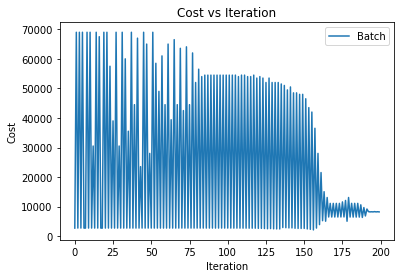

Mini Batch


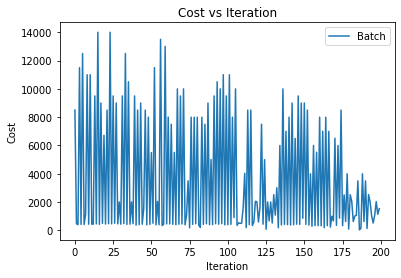

Stochastic


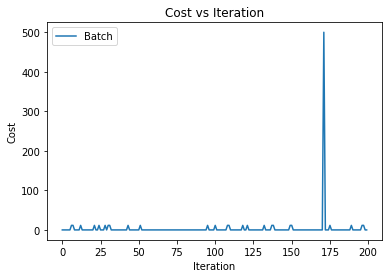

Learning Rate: 0.001
Batch


Mini Batch


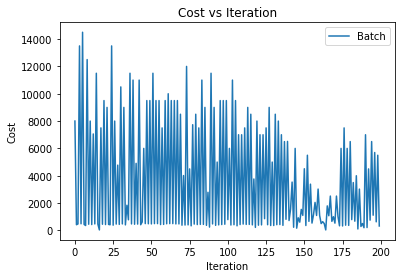

Stochastic


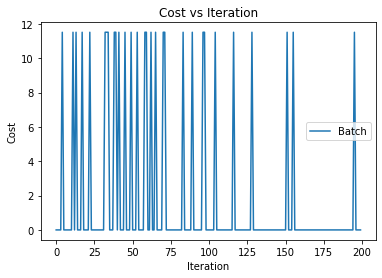

Learning Rate: 0.0001
Batch


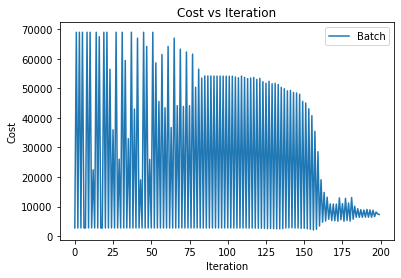

Mini Batch


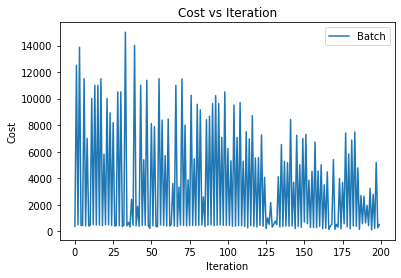

Stochastic


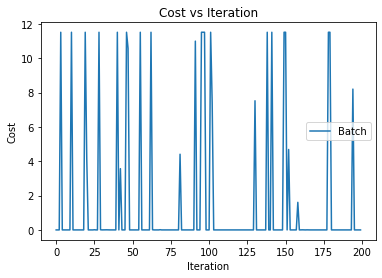

Split Number: 1
Learning Rate: 0.01
Batch


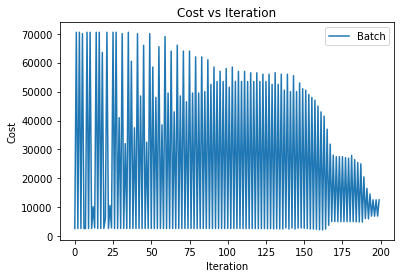

Mini Batch


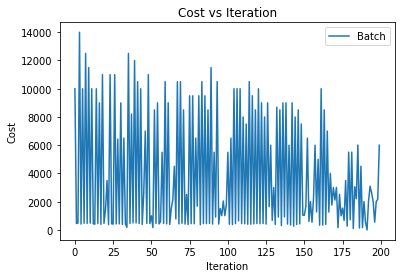

Stochastic


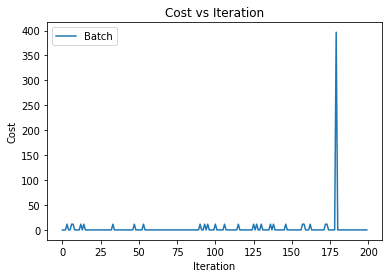

Learning Rate: 0.001
Batch


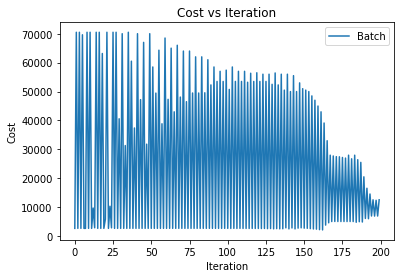

Mini Batch


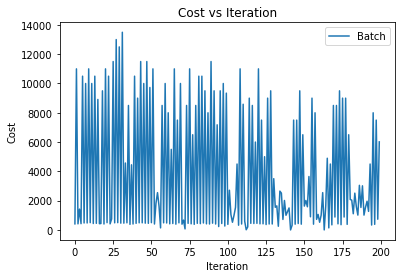

Stochastic


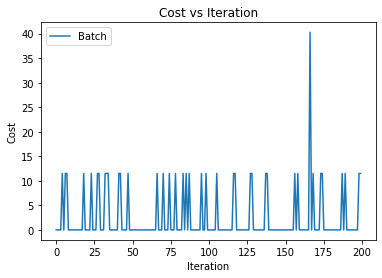

Learning Rate: 0.0001
Batch


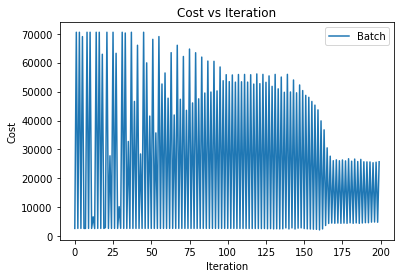

Mini Batch


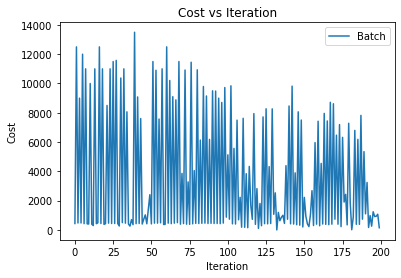

Stochastic


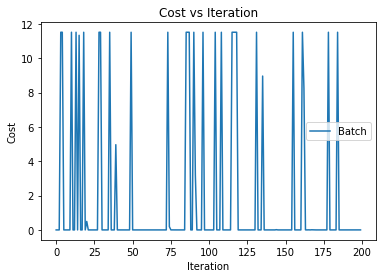

Split Number: 2
Learning Rate: 0.01
Batch


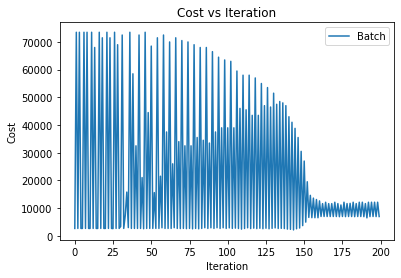

Mini Batch


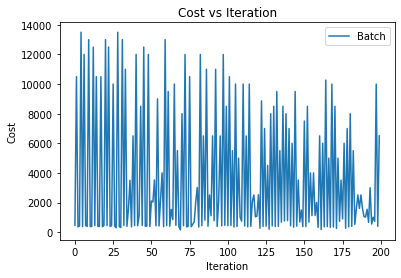

Stochastic


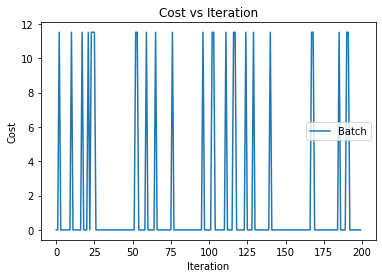

Learning Rate: 0.001
Batch


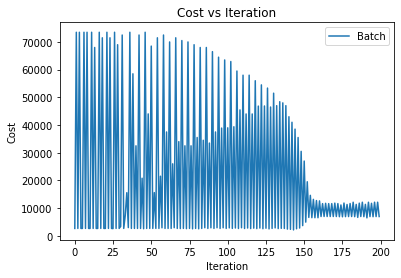

Mini Batch


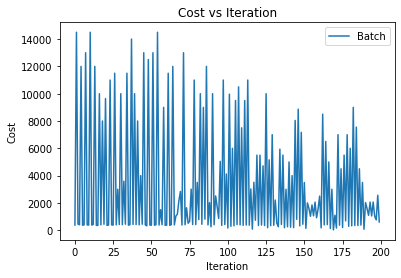

Stochastic


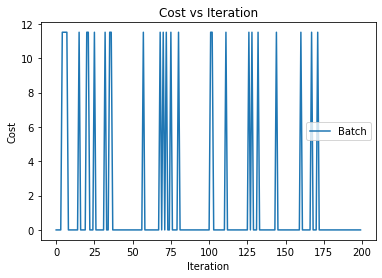

Learning Rate: 0.0001
Batch


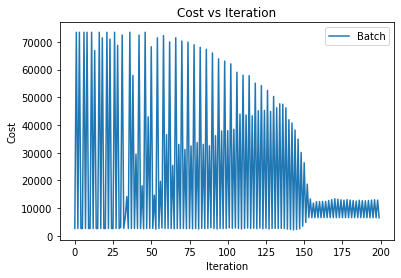

Mini Batch


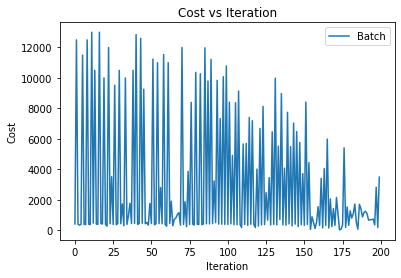

Stochastic


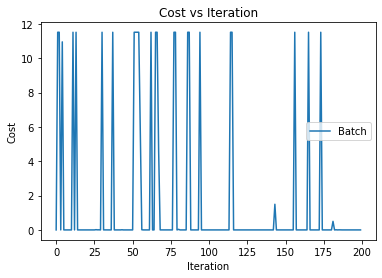

Split Number: 3
Learning Rate: 0.01
Batch


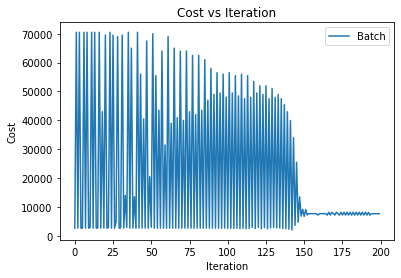

Mini Batch


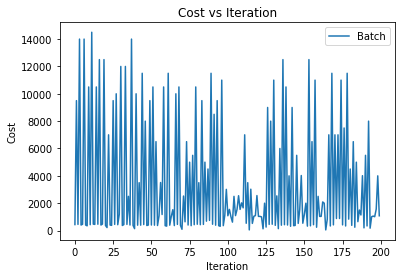

Stochastic


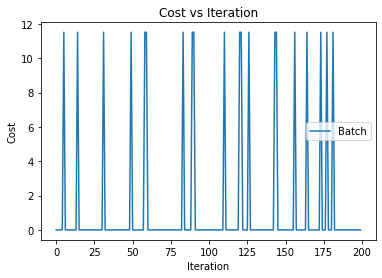

Learning Rate: 0.001
Batch


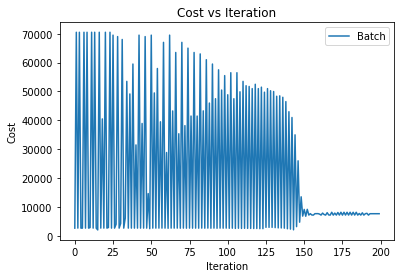

Mini Batch


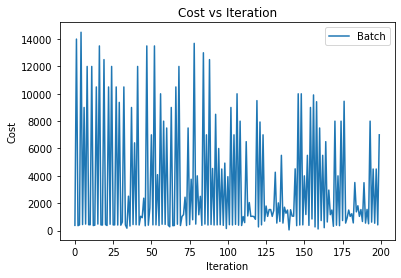

Stochastic


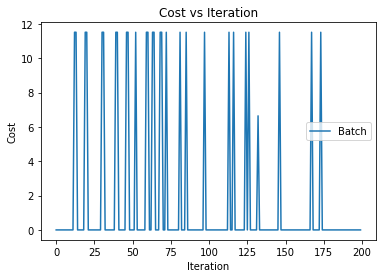

Learning Rate: 0.0001
Batch


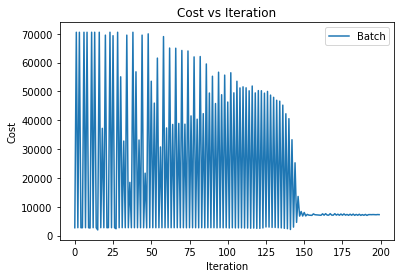

Mini Batch


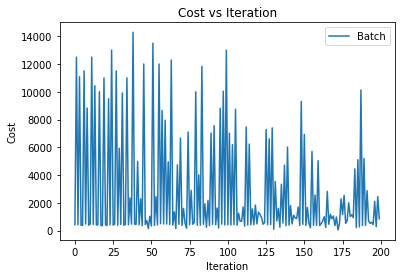

Stochastic


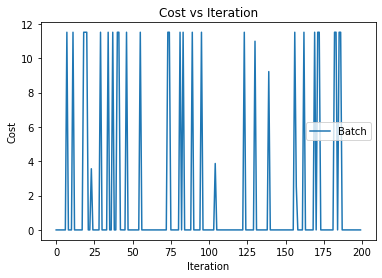

Split Number: 4
Learning Rate: 0.01
Batch


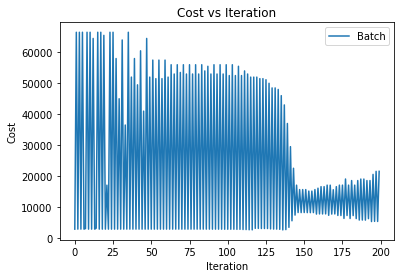

Mini Batch


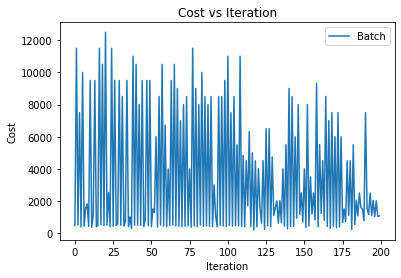

Stochastic


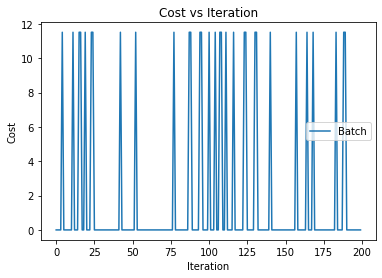

Learning Rate: 0.001
Batch


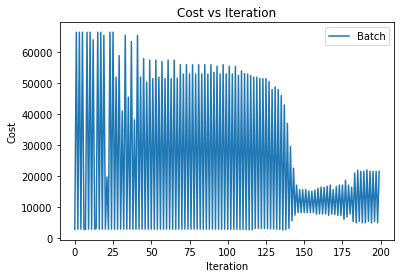

Mini Batch


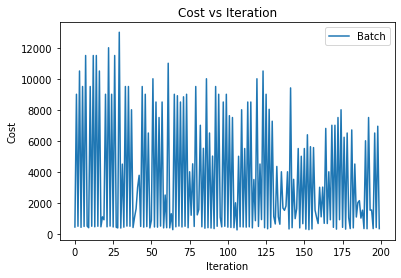

Stochastic


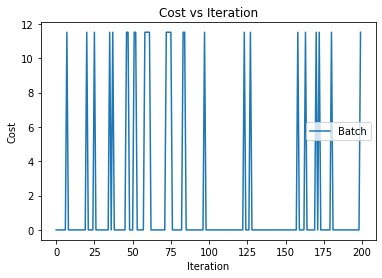

Learning Rate: 0.0001
Batch


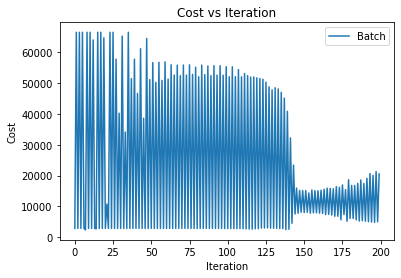

Mini Batch


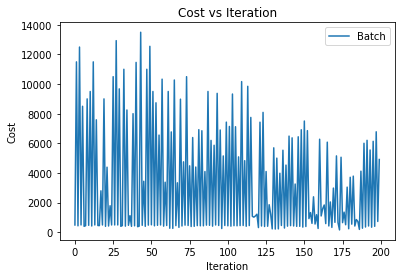

Stochastic


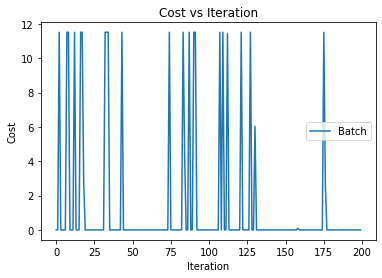

Split Number: 5
Learning Rate: 0.01
Batch


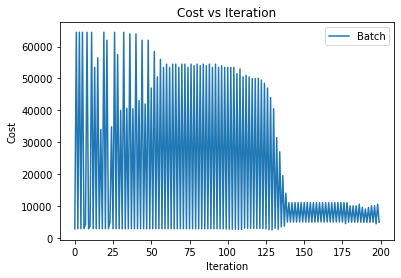

Mini Batch


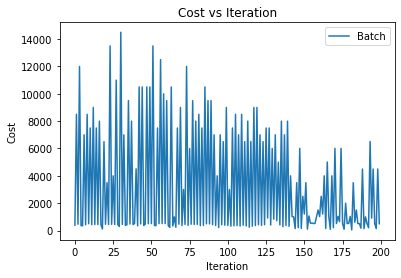

Stochastic


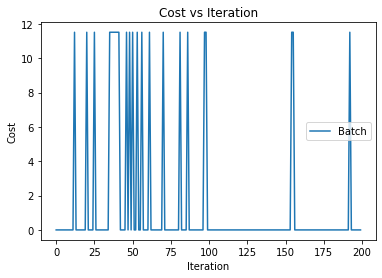

Learning Rate: 0.001
Batch


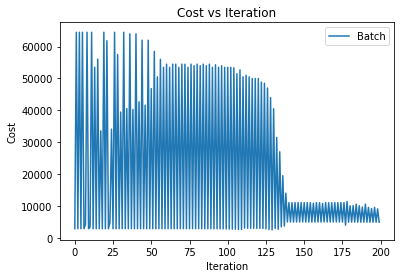

Mini Batch


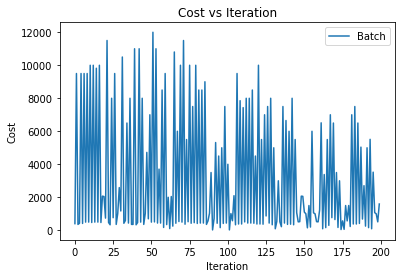

Stochastic


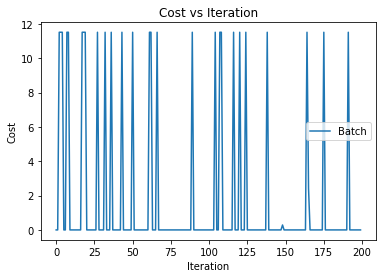

Learning Rate: 0.0001
Batch


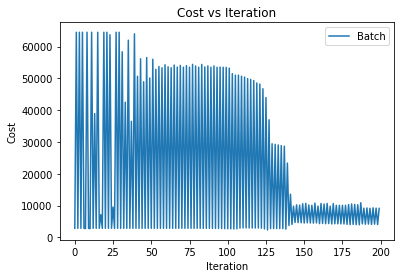

Mini Batch


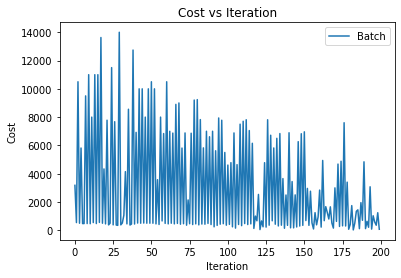

Stochastic


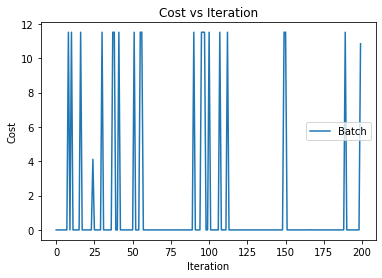

Split Number: 6
Learning Rate: 0.01
Batch


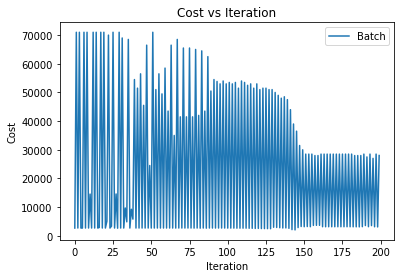

Mini Batch


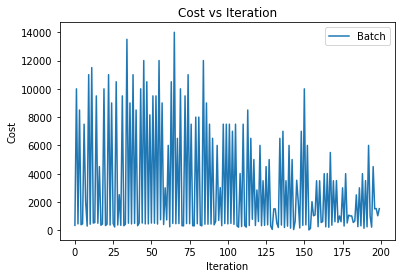

Stochastic


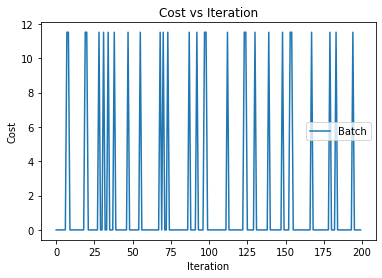

Learning Rate: 0.001
Batch


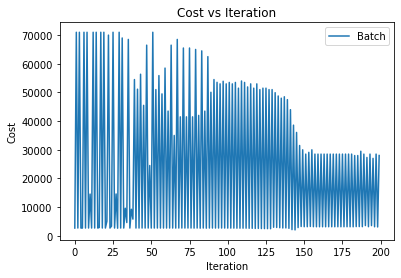

Mini Batch


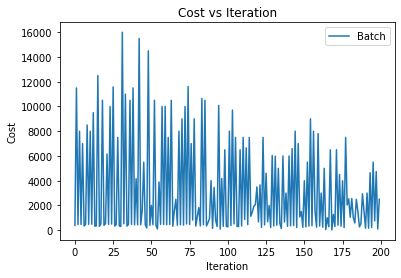

Stochastic


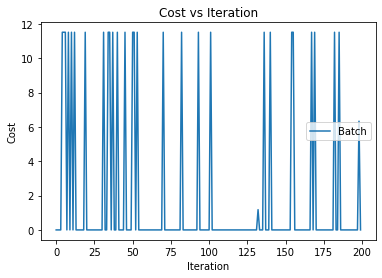

Learning Rate: 0.0001
Batch


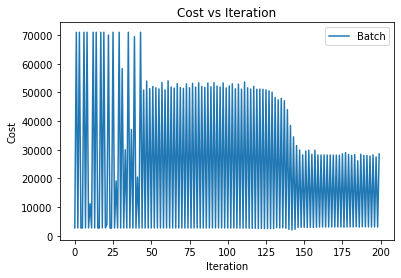

Mini Batch


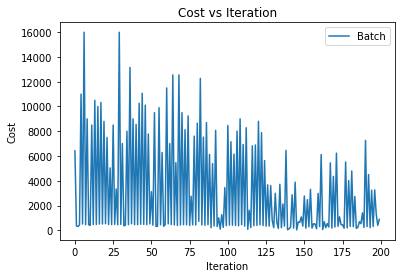

Stochastic


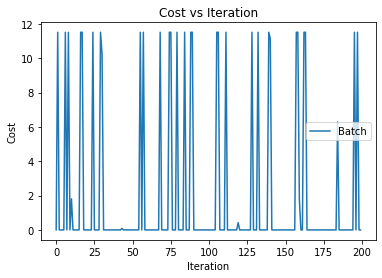

Split Number: 7
Learning Rate: 0.01
Batch


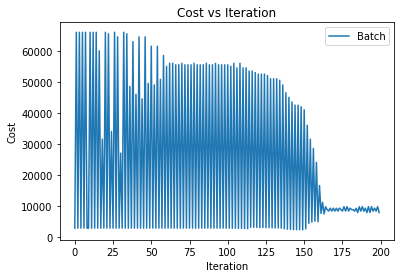

Mini Batch


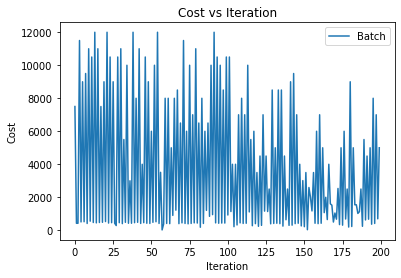

Stochastic


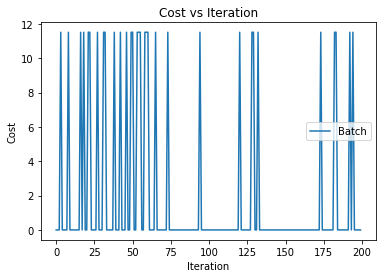

Learning Rate: 0.001
Batch


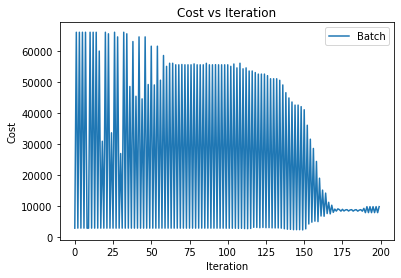

Mini Batch


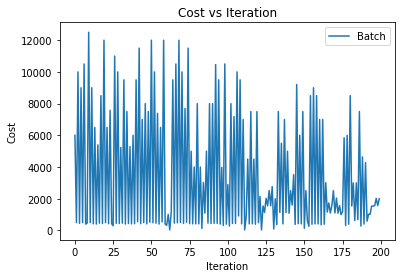

Stochastic


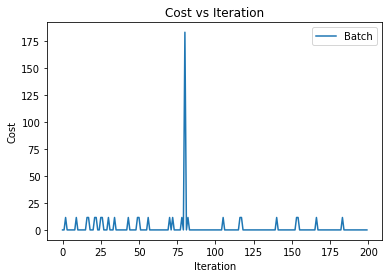

Learning Rate: 0.0001
Batch


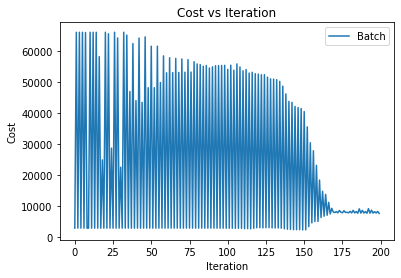

Mini Batch


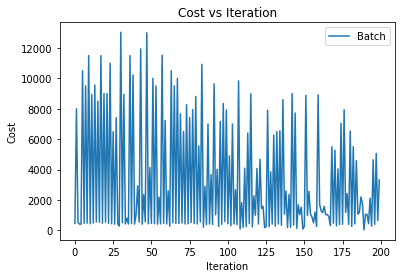

Stochastic


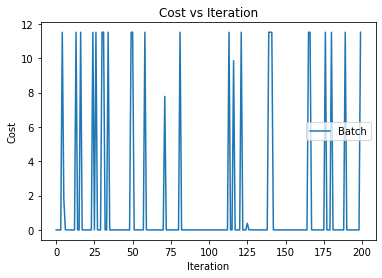

Split Number: 8
Learning Rate: 0.01
Batch


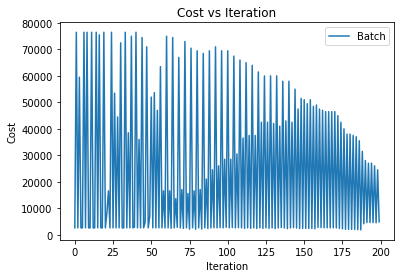

Mini Batch


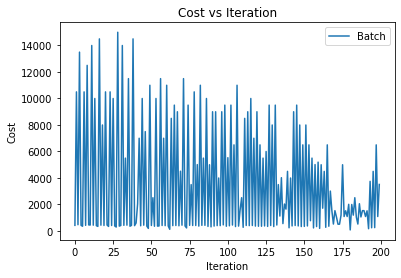

Stochastic


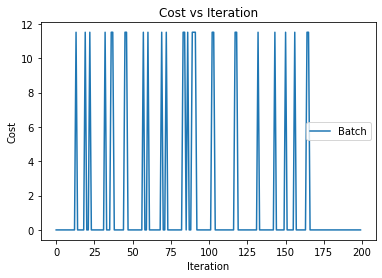

Learning Rate: 0.001
Batch


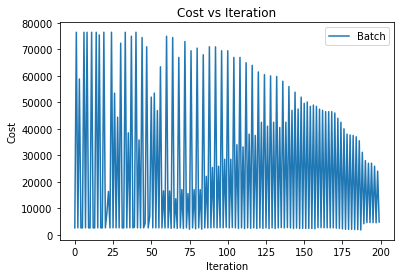

Mini Batch


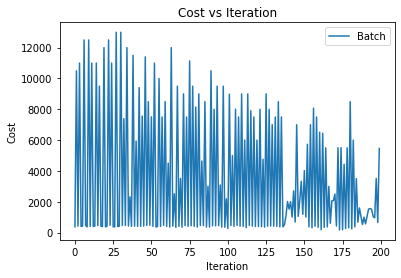

Stochastic


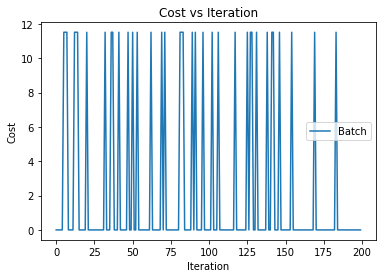

Learning Rate: 0.0001
Batch


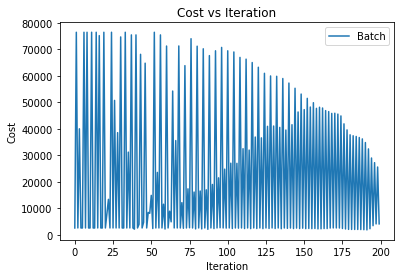

Mini Batch


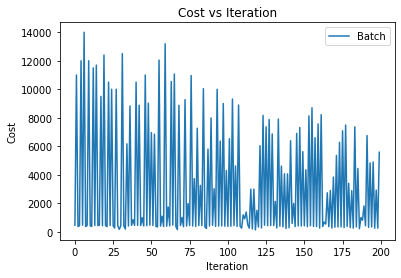

Stochastic


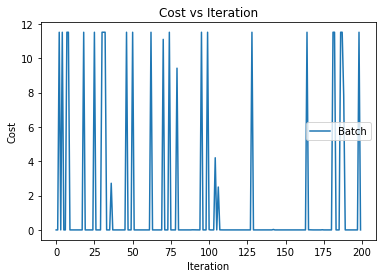

Split Number: 9
Learning Rate: 0.01
Batch


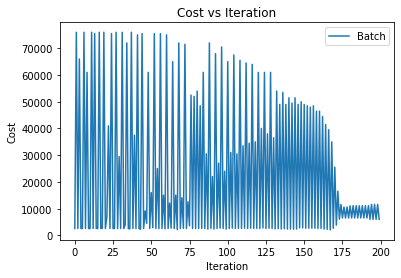

Mini Batch


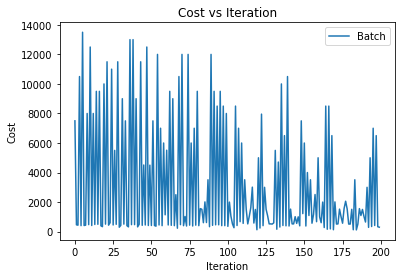

Stochastic


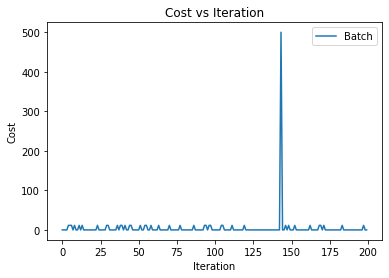

Learning Rate: 0.001
Batch


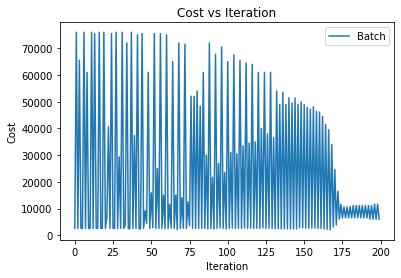

Mini Batch


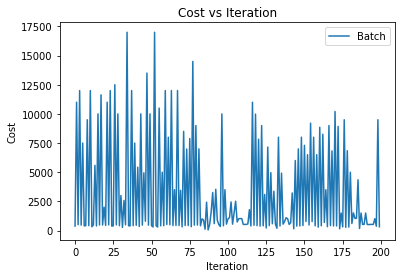

Stochastic


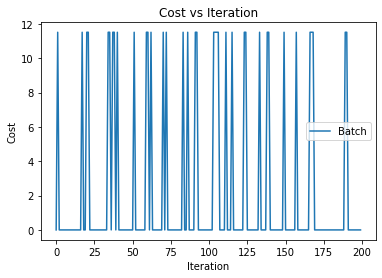

Learning Rate: 0.0001
Batch


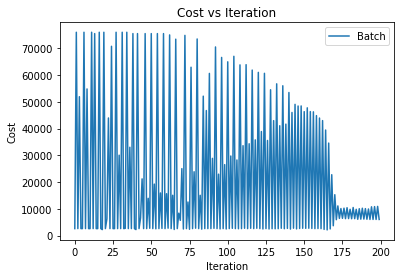

Mini Batch


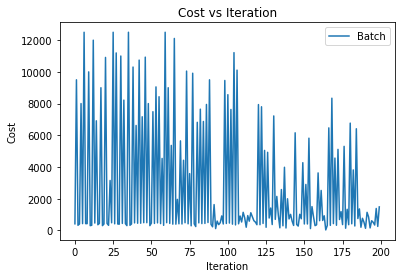

Stochastic


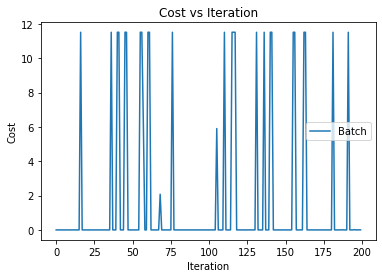

In [3129]:
for i in range(num_datasets):
    print(f"Split Number: {i}")
    LR1_batch[i] = {}
    LR1_mini_batch[i] = {}
    LR1_stochastic[i] = {}

    cleaned_training_df = drop_rows_with_no_values(training_dfs[i].copy())

    batch_size_batch = cleaned_training_df.shape[0]
    batch_size_mini_batch = 60
    batch_size_stochastic = 1

    for learning_rate in learning_rates:
        print(f"Learning Rate: {learning_rate}")
        print("Batch")
        LR1_batch[i][learning_rate] = logistic_train(cleaned_training_df, learning_rate, epochs, batch_size_batch)
        print("Mini Batch")
        LR1_mini_batch[i][learning_rate] = logistic_train(cleaned_training_df, learning_rate, epochs, batch_size_mini_batch)
        print("Stochastic")
        LR1_stochastic[i][learning_rate] = logistic_train(cleaned_training_df, learning_rate, epochs, batch_size_stochastic)

The differences between batch, mini-batch and stochastic gradient descent can be seen from the following differences in the accuracy in training classification and testing classification for different learning rates

In [3130]:
LR1_batch_training_accuracy = {}
LR1_batch_testing_accuracy = {}

LR1_mini_batch_training_accuracy = {}
LR1_mini_batch_testing_accuracy = {}

LR1_stochastic_training_accuracy = {}
LR1_stochastic_testing_accuracy = {}

LR1_batch_training_metrics = {}
LR1_batch_testing_metrics = {}

LR1_mini_batch_training_metrics = {}
LR1_mini_batch_testing_metrics = {}

LR1_stochastic_training_metrics = {}
LR1_stochastic_testing_metrics = {}

In [3131]:
for threshold in thresholds:
    for learning_rate in learning_rates:
        LR1_batch_training_accuracy[(threshold, learning_rate)] = []
        LR1_mini_batch_training_accuracy[(threshold, learning_rate)] = []
        LR1_stochastic_training_accuracy[(threshold, learning_rate)] = []

        LR1_batch_testing_accuracy[(threshold, learning_rate)] = []
        LR1_mini_batch_testing_accuracy[(threshold, learning_rate)] = []
        LR1_stochastic_testing_accuracy[(threshold, learning_rate)] = []

        LR1_batch_training_metrics[(threshold, learning_rate)] = []
        LR1_mini_batch_training_metrics[(threshold, learning_rate)] = []
        LR1_stochastic_training_metrics[(threshold, learning_rate)] = []

        LR1_batch_testing_metrics[(threshold, learning_rate)] = []
        LR1_mini_batch_testing_metrics[(threshold, learning_rate)] = []
        LR1_stochastic_testing_metrics[(threshold, learning_rate)] = []

        for i in range(num_datasets):
            cleaned_training_df = drop_rows_with_no_values(training_dfs[i].copy())
            cleaned_testing_df = drop_rows_with_no_values(testing_dfs[i].copy())

            LR1_batch_training_accuracy[(threshold, learning_rate)].append(logistic_accuracy(threshold, cleaned_training_df, LR1_batch[i][learning_rate]))
            LR1_mini_batch_training_accuracy[(threshold, learning_rate)].append(logistic_accuracy(threshold, cleaned_training_df, LR1_mini_batch[i][learning_rate]))
            LR1_stochastic_training_accuracy[(threshold, learning_rate)].append(logistic_accuracy(threshold, cleaned_training_df, LR1_stochastic[i][learning_rate]))

            LR1_batch_testing_accuracy[(threshold, learning_rate)].append(logistic_accuracy(threshold, cleaned_testing_df, LR1_batch[i][learning_rate]))
            LR1_mini_batch_testing_accuracy[(threshold, learning_rate)].append(logistic_accuracy(threshold, cleaned_testing_df, LR1_mini_batch[i][learning_rate]))
            LR1_stochastic_testing_accuracy[(threshold, learning_rate)].append(logistic_accuracy(threshold, cleaned_testing_df, LR1_stochastic[i][learning_rate]))

            LR1_batch_training_metrics[(threshold, learning_rate)].append(logistic_metrics(threshold, cleaned_training_df, LR1_batch[i][learning_rate]))
            LR1_mini_batch_training_metrics[(threshold, learning_rate)].append(logistic_metrics(threshold, cleaned_training_df, LR1_mini_batch[i][learning_rate]))
            LR1_stochastic_training_metrics[(threshold, learning_rate)].append(logistic_metrics(threshold, cleaned_training_df, LR1_stochastic[i][learning_rate]))

            LR1_batch_testing_metrics[(threshold, learning_rate)].append(logistic_metrics(threshold, cleaned_testing_df, LR1_batch[i][learning_rate]))
            LR1_mini_batch_testing_metrics[(threshold, learning_rate)].append(logistic_metrics(threshold, cleaned_testing_df, LR1_mini_batch[i][learning_rate]))
            LR1_stochastic_testing_metrics[(threshold, learning_rate)].append(logistic_metrics(threshold, cleaned_testing_df, LR1_stochastic[i][learning_rate]))

Threshold: 0.5
Learning Rate: 0.01


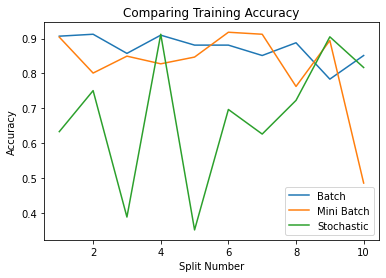

Learning Rate: 0.001


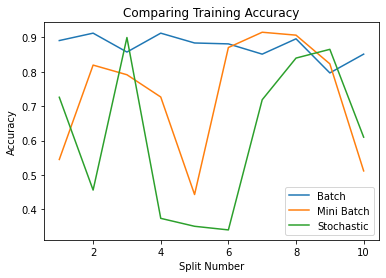

Learning Rate: 0.0001


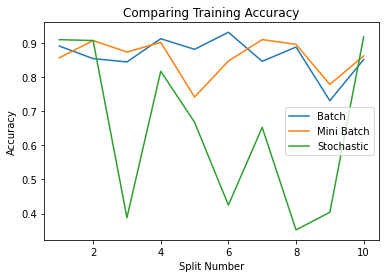

Threshold: 0.3
Learning Rate: 0.01


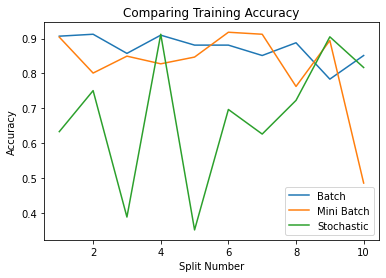

Learning Rate: 0.001


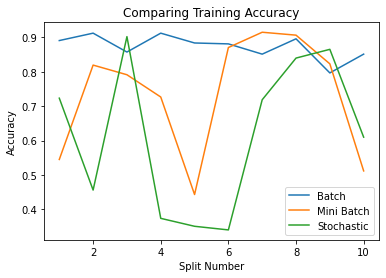

Learning Rate: 0.0001


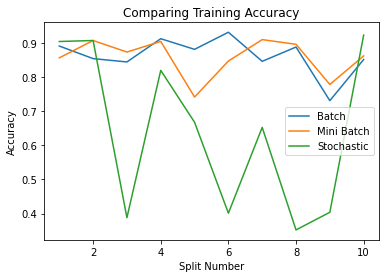

Threshold: 0.4
Learning Rate: 0.01


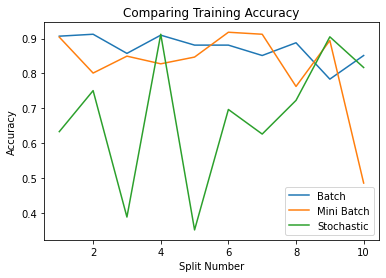

Learning Rate: 0.001


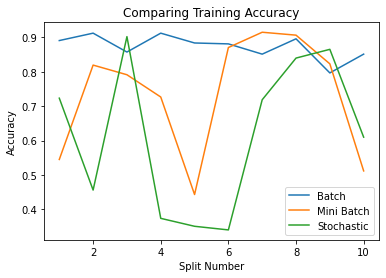

Learning Rate: 0.0001


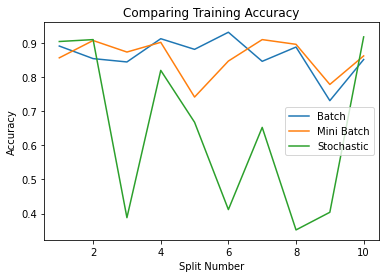

Threshold: 0.6
Learning Rate: 0.01


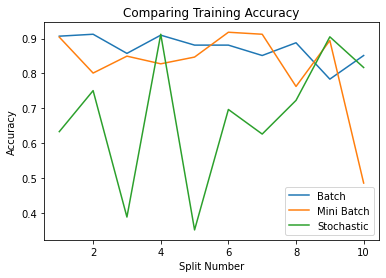

Learning Rate: 0.001


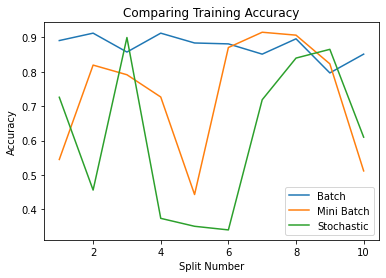

Learning Rate: 0.0001


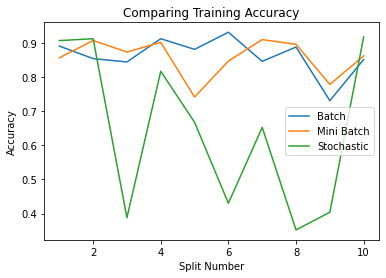

Threshold: 0.7
Learning Rate: 0.01


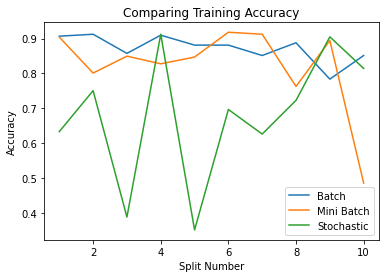

Learning Rate: 0.001


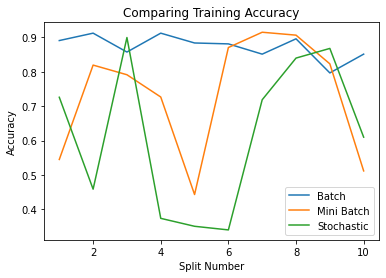

Learning Rate: 0.0001


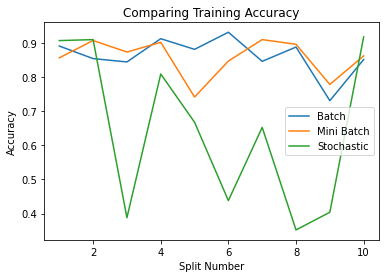

In [3132]:
for threshold in thresholds:
    print(f"Threshold: {threshold}")
    for learning_rate in learning_rates:
        print(f"Learning Rate: {learning_rate}")
        plot_graph("Comparing Training Accuracy", "Split Number", "Accuracy", [LR1_batch_training_accuracy[(threshold, learning_rate)], LR1_mini_batch_training_accuracy[(threshold, learning_rate)], LR1_stochastic_training_accuracy[(threshold, learning_rate)]], ["Batch", "Mini Batch", "Stochastic"], x_axis_value)

Threshold: 0.5
Learning Rate: 0.01


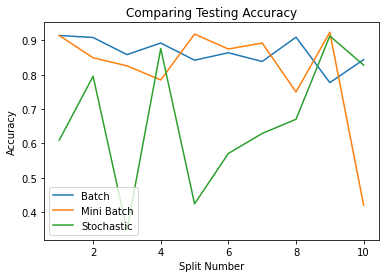

Learning Rate: 0.001


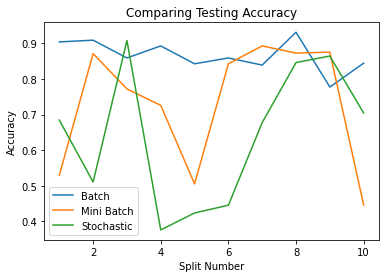

Learning Rate: 0.0001


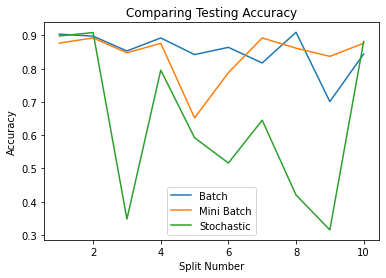

Threshold: 0.3
Learning Rate: 0.01


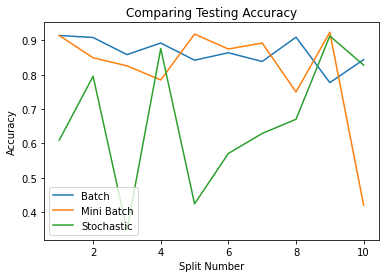

Learning Rate: 0.001


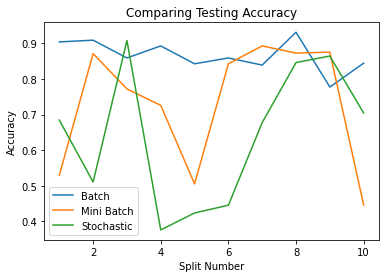

Learning Rate: 0.0001


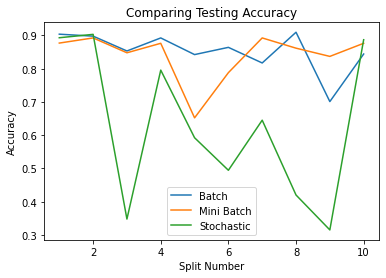

Threshold: 0.4
Learning Rate: 0.01


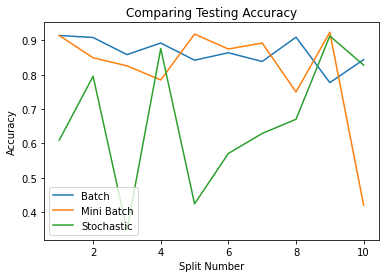

Learning Rate: 0.001


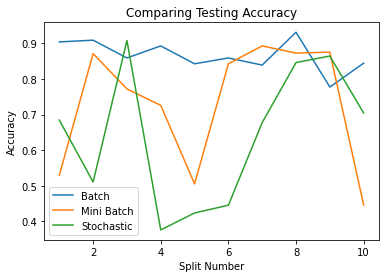

Learning Rate: 0.0001


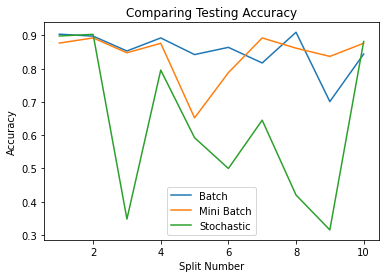

Threshold: 0.6
Learning Rate: 0.01


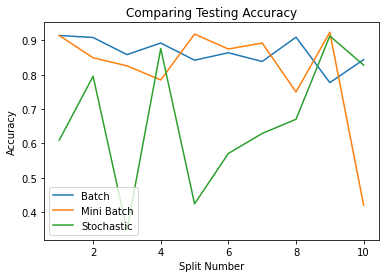

Learning Rate: 0.001


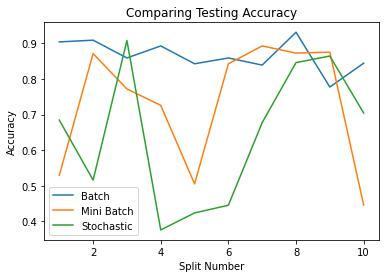

Learning Rate: 0.0001


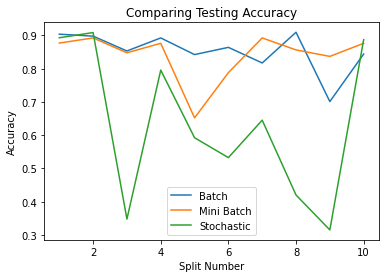

Threshold: 0.7
Learning Rate: 0.01


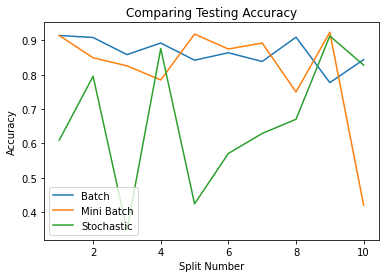

Learning Rate: 0.001


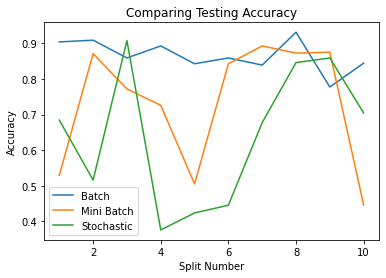

Learning Rate: 0.0001


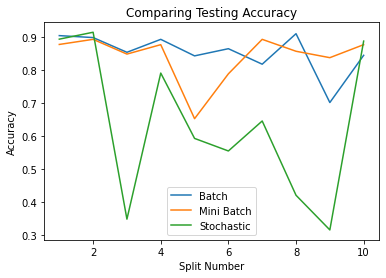

In [3133]:
for threshold in thresholds:
    print(f"Threshold: {threshold}")
    for learning_rate in learning_rates:
        print(f"Learning Rate: {learning_rate}")
        plot_graph("Comparing Testing Accuracy", "Split Number", "Accuracy", [LR1_batch_testing_accuracy[(threshold, learning_rate)], LR1_mini_batch_testing_accuracy[(threshold, learning_rate)], LR1_stochastic_testing_accuracy[(threshold, learning_rate)]], ["Batch", "Mini Batch", "Stochastic"], x_axis_value)

#### Learning Task 2
You should apply Feature Engineering Task 1 and Feature Engineering Task 2 and then build a classification model (LR2) using Logistic Regression. What happens to testing accuracy when you vary the decision probability threshold from 0.5 to 0.3, 0.4, 0.6 and 0.7. 

In [3134]:
# The LR2 models for various splits

LR2_batch = {}
LR2_mini_batch = {}
LR2_stochastic = {}

Split Number: 0
Learning Rate: 0.01


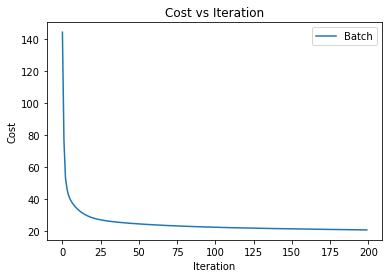

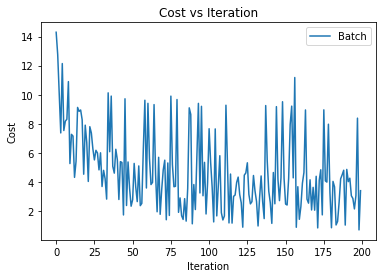

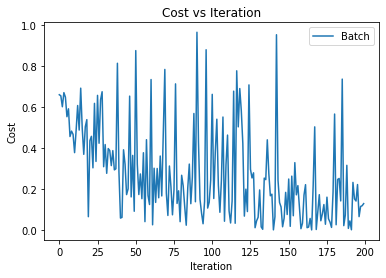

Learning Rate: 0.001


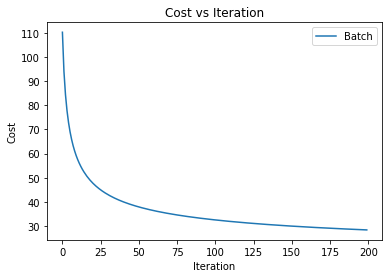

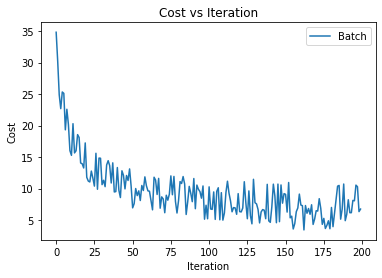

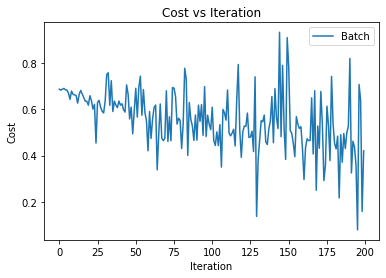

Learning Rate: 0.0001


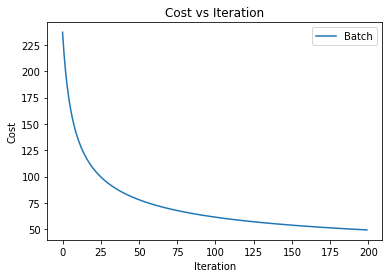

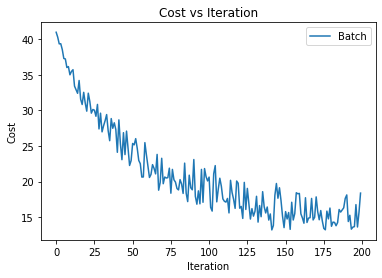

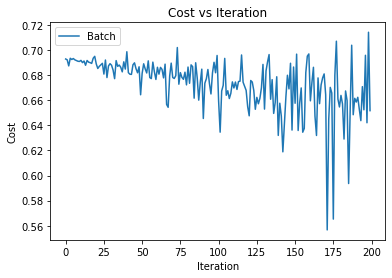

Split Number: 1
Learning Rate: 0.01


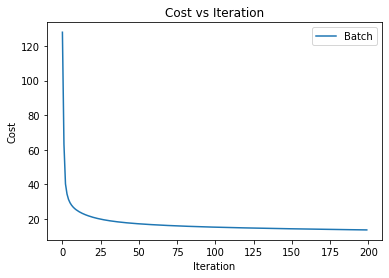

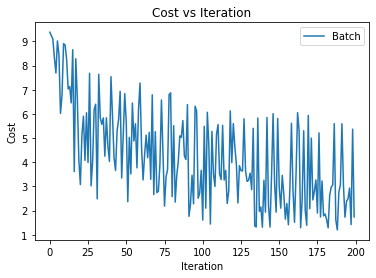

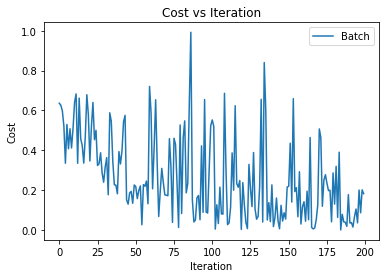

Learning Rate: 0.001


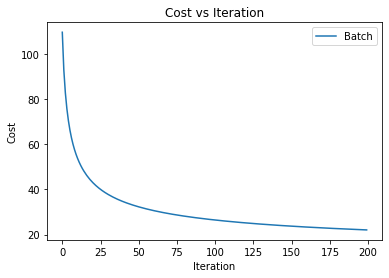

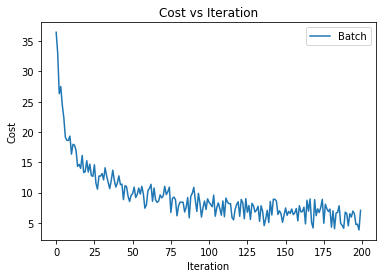

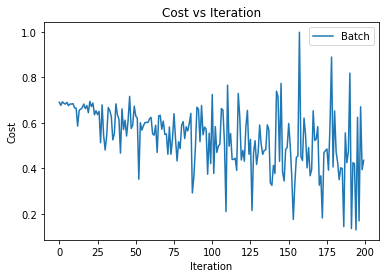

Learning Rate: 0.0001


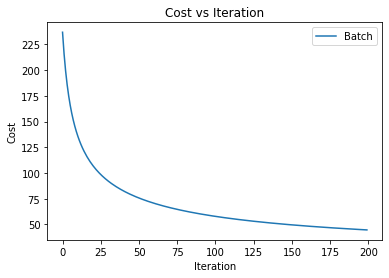

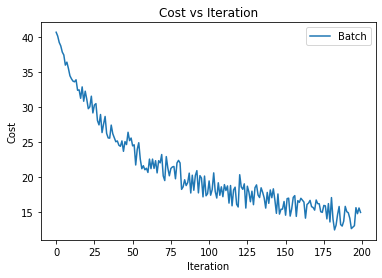

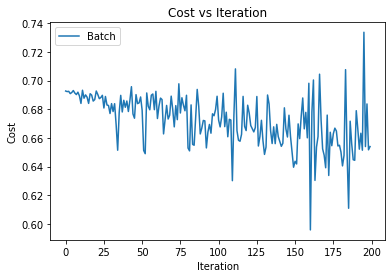

Split Number: 2
Learning Rate: 0.01


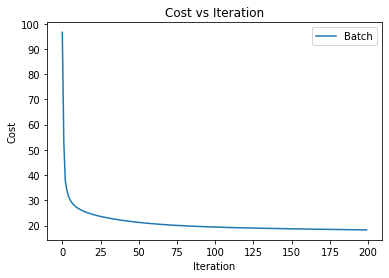

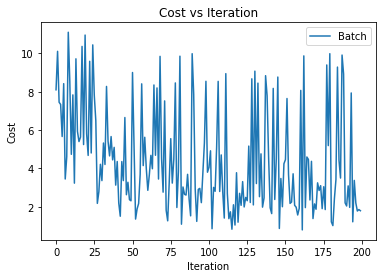

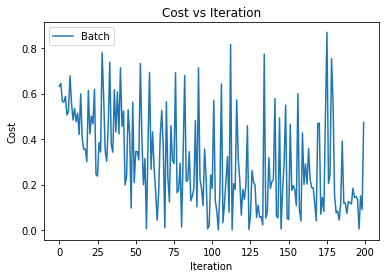

Learning Rate: 0.001


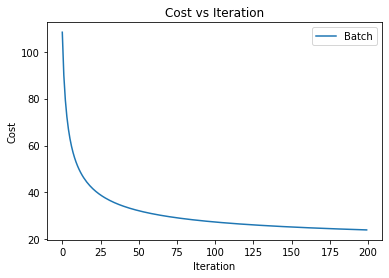

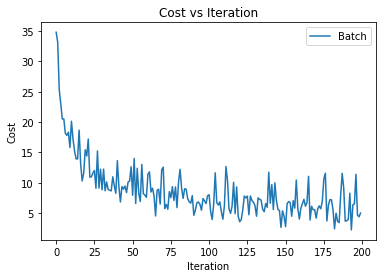

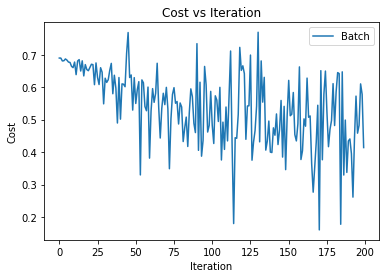

Learning Rate: 0.0001


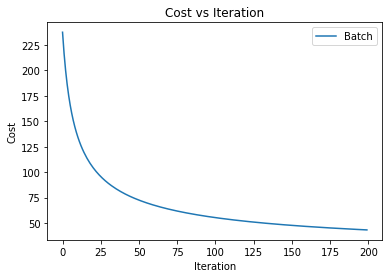

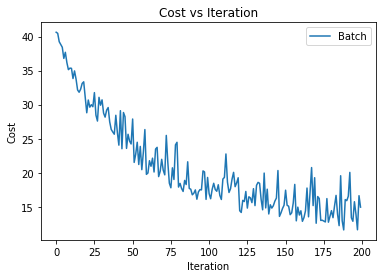

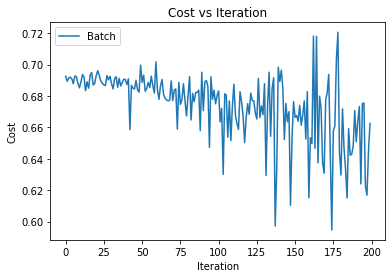

Split Number: 3
Learning Rate: 0.01


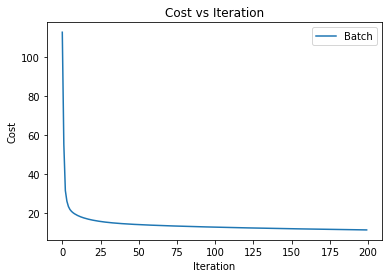

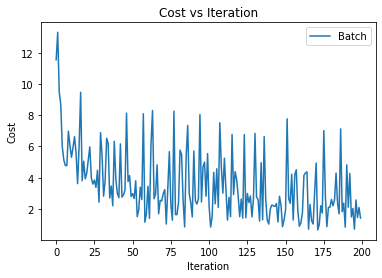

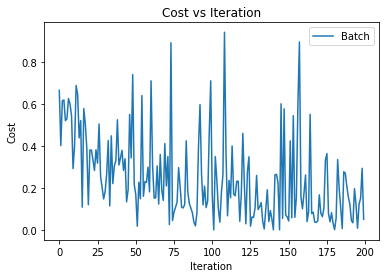

Learning Rate: 0.001


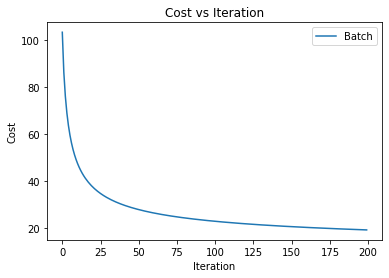

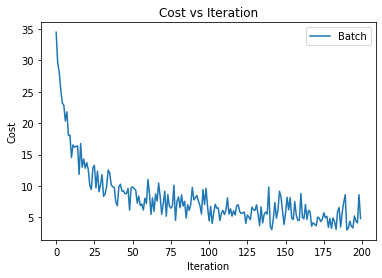

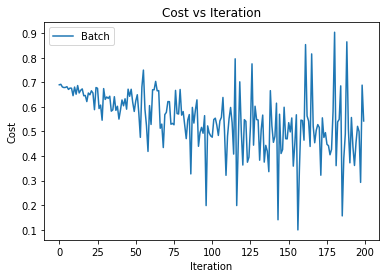

Learning Rate: 0.0001


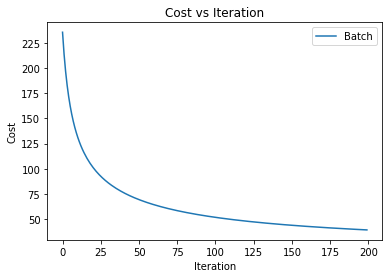

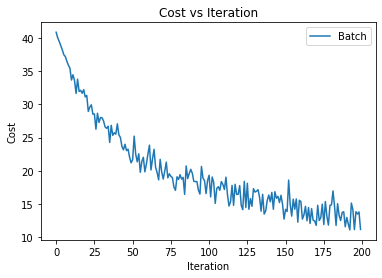

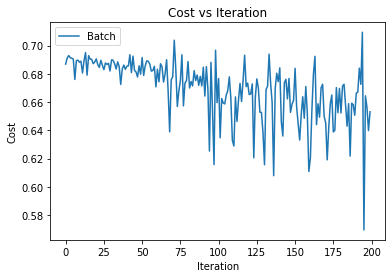

Split Number: 4
Learning Rate: 0.01


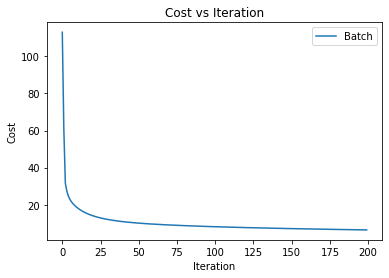

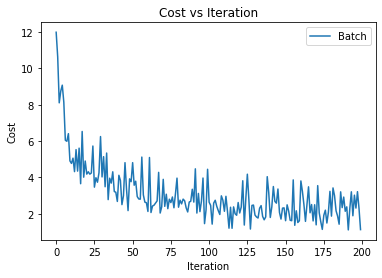

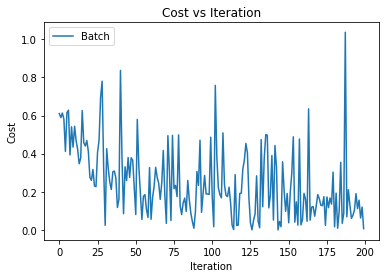

Learning Rate: 0.001


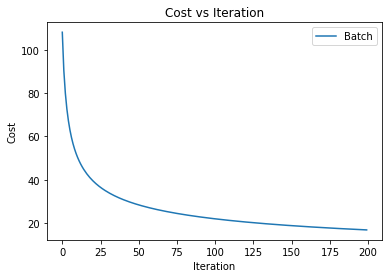

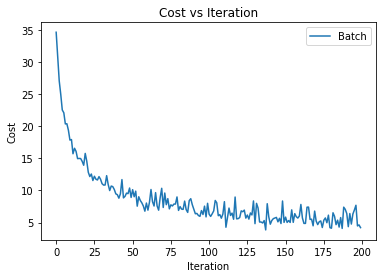

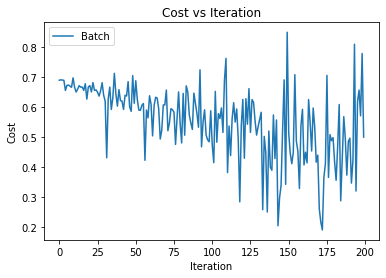

Learning Rate: 0.0001


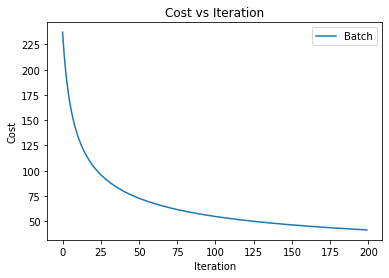

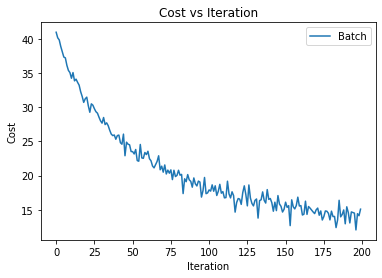

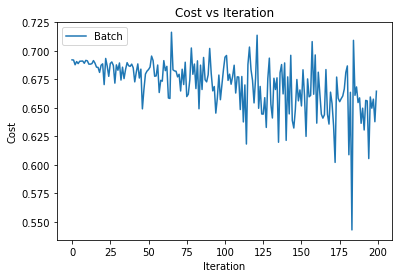

Split Number: 5
Learning Rate: 0.01


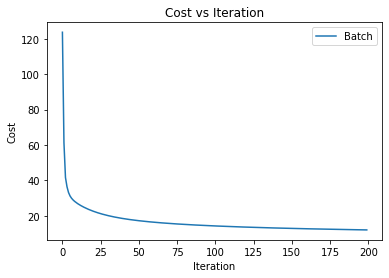

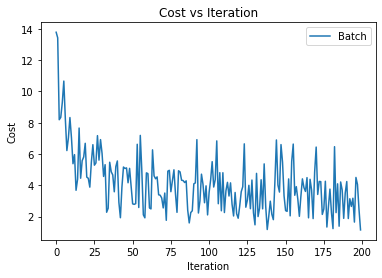

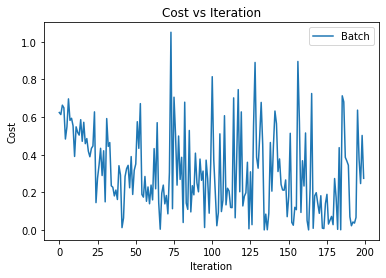

Learning Rate: 0.001


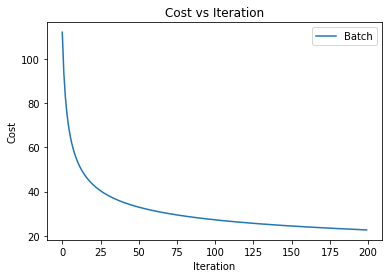

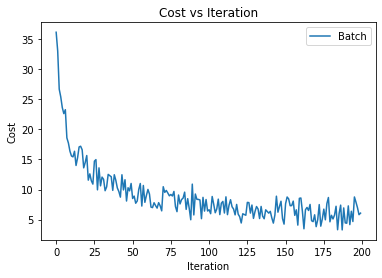

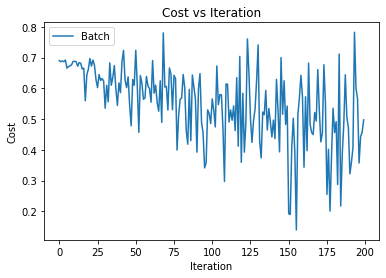

Learning Rate: 0.0001


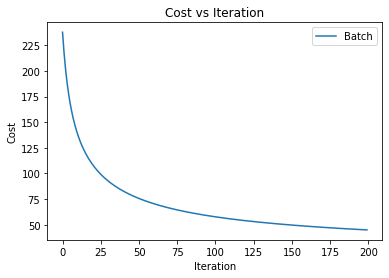

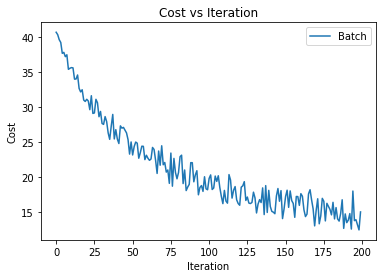

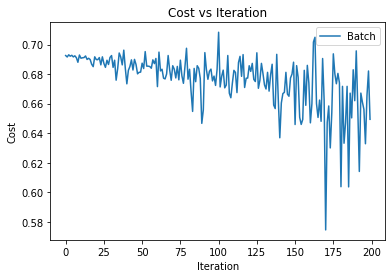

Split Number: 6
Learning Rate: 0.01


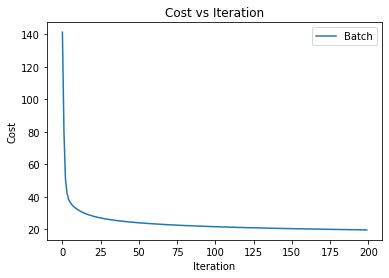

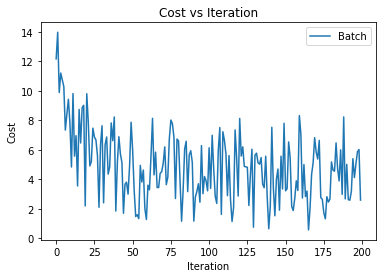

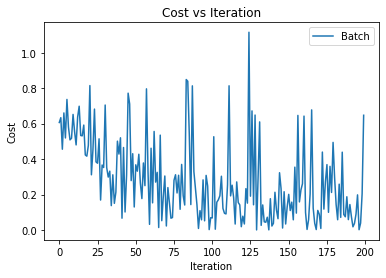

Learning Rate: 0.001


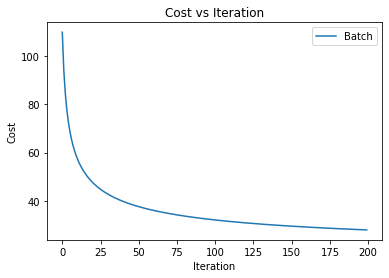

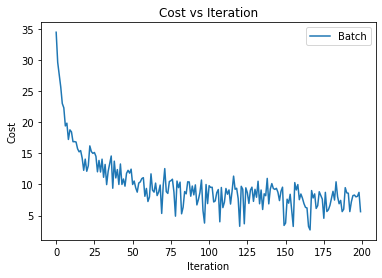

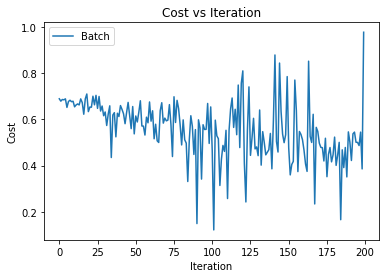

Learning Rate: 0.0001


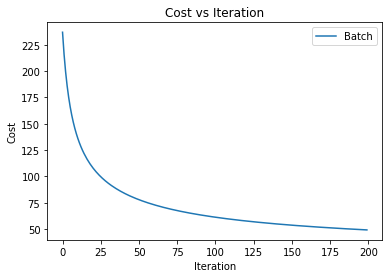

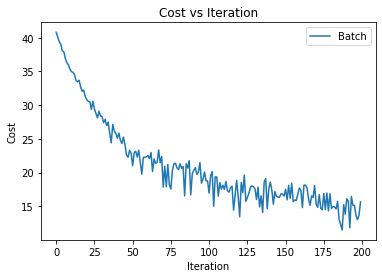

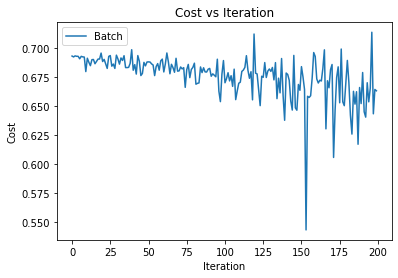

Split Number: 7
Learning Rate: 0.01


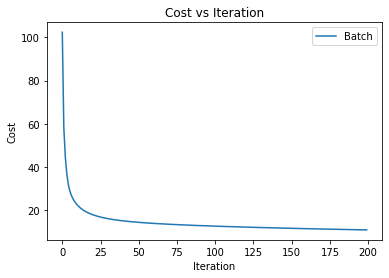

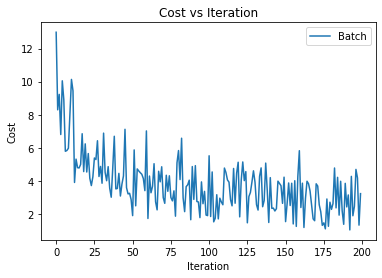

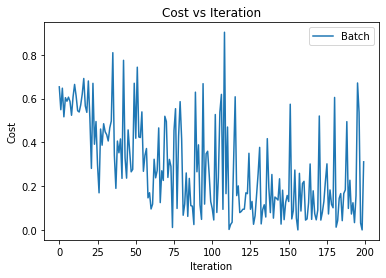

Learning Rate: 0.001


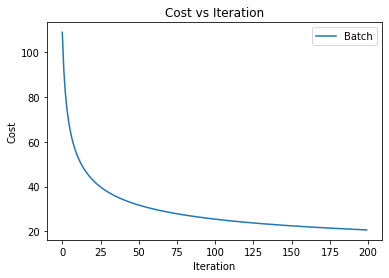

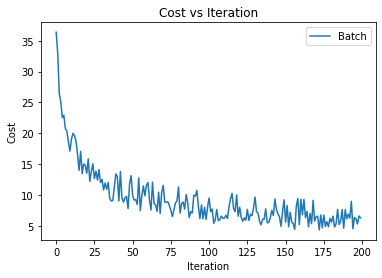

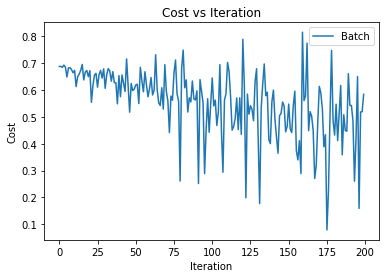

Learning Rate: 0.0001


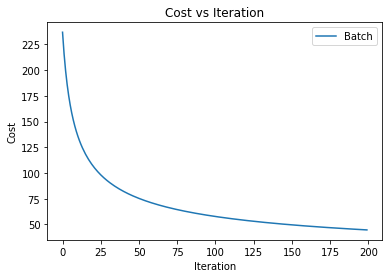

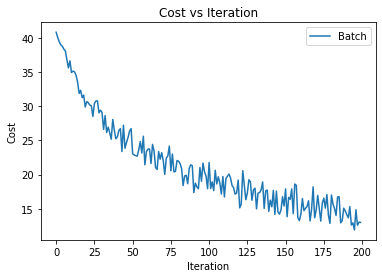

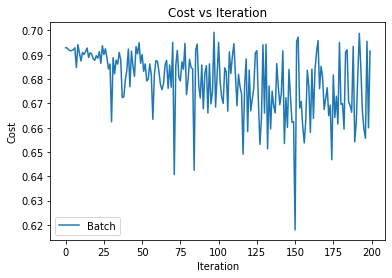

Split Number: 8
Learning Rate: 0.01


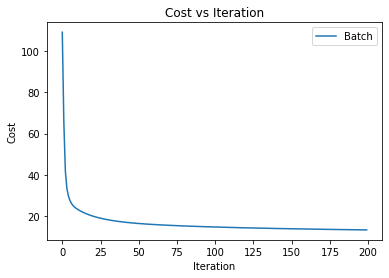

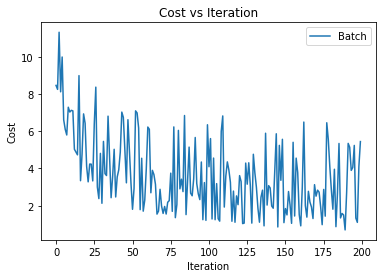

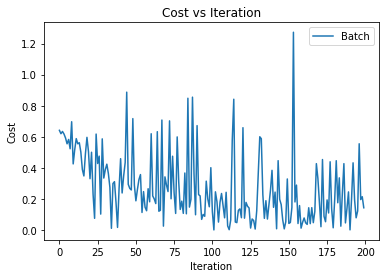

Learning Rate: 0.001


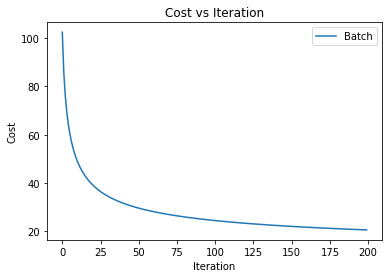

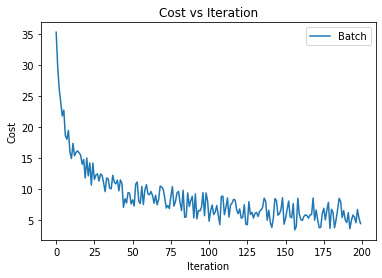

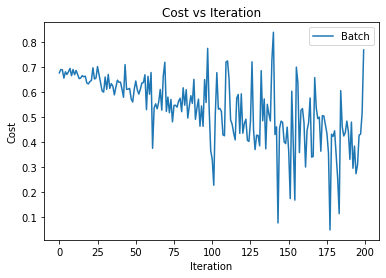

Learning Rate: 0.0001


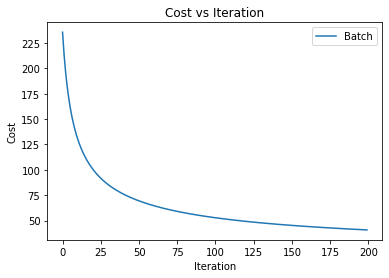

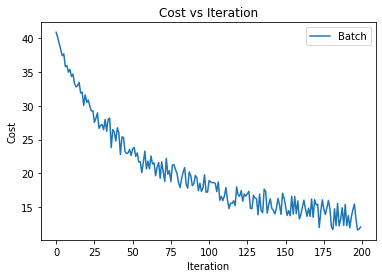

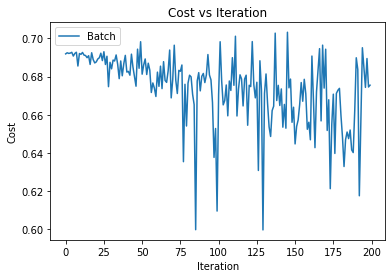

Split Number: 9
Learning Rate: 0.01


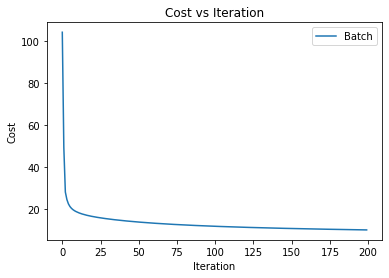

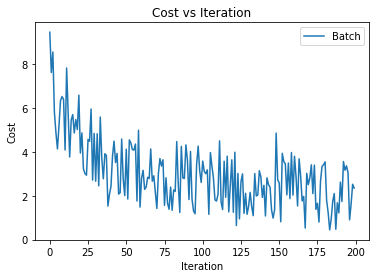

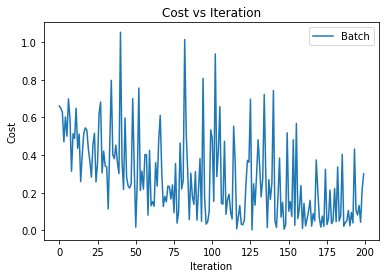

Learning Rate: 0.001


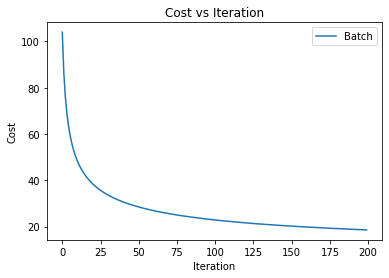

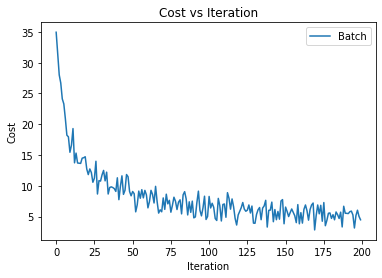

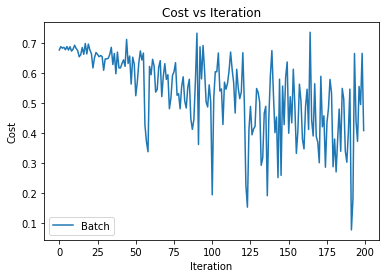

Learning Rate: 0.0001


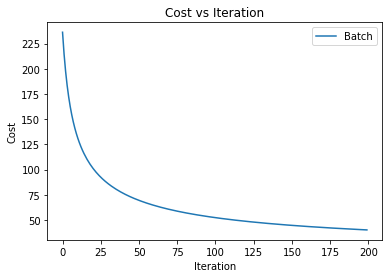

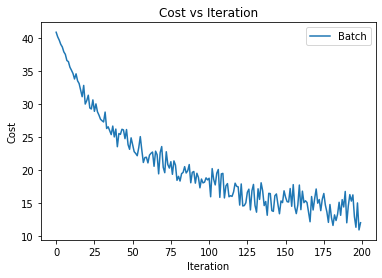

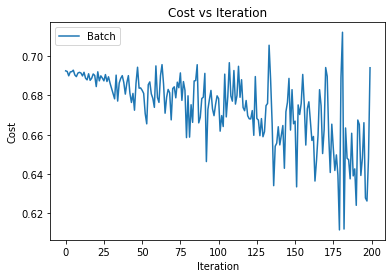

In [3135]:
for i in range(num_datasets):
    print(f"Split Number: {i}")
    LR2_batch[i] = {}
    LR2_mini_batch[i] = {}
    LR2_stochastic[i] = {}

    cleaned_training_df, cleaned_testing_df = fill_missing_values(training_dfs[i].copy(), testing_dfs[i].copy())
    cleaned_training_df, cleaned_testing_df = normalize_data(cleaned_training_df, cleaned_testing_df)

    batch_size_batch = cleaned_training_df.shape[0]
    batch_size_mini_batch = 60
    batch_size_stochastic = 1

    for learning_rate in learning_rates:
        print(f"Learning Rate: {learning_rate}")
        LR2_batch[i][learning_rate] = logistic_train(cleaned_training_df, learning_rate, epochs, batch_size_batch)
        LR2_mini_batch[i][learning_rate] = logistic_train(cleaned_training_df, learning_rate, epochs, batch_size_mini_batch)
        LR2_stochastic[i][learning_rate] = logistic_train(cleaned_training_df, learning_rate, epochs, batch_size_stochastic)

The differences between batch, mini-batch and stochastic gradient descent can be seen from the following differences in the accuracy in training classification and testing classification for different learning rates

In [3136]:
LR2_batch_training_accuracy = {}
LR2_batch_testing_accuracy = {}

LR2_mini_batch_training_accuracy = {}
LR2_mini_batch_testing_accuracy = {}

LR2_stochastic_training_accuracy = {}
LR2_stochastic_testing_accuracy = {}

LR2_batch_training_metrics = {}
LR2_batch_testing_metrics = {}

LR2_mini_batch_training_metrics = {}
LR2_mini_batch_testing_metrics = {}

LR2_stochastic_training_metrics = {}
LR2_stochastic_testing_metrics = {}

In [3137]:
for threshold in thresholds:
    for learning_rate in learning_rates:
        LR2_batch_training_accuracy[(threshold, learning_rate)] = []
        LR2_mini_batch_training_accuracy[(threshold, learning_rate)] = []
        LR2_stochastic_training_accuracy[(threshold, learning_rate)] = []

        LR2_batch_testing_accuracy[(threshold, learning_rate)] = []
        LR2_mini_batch_testing_accuracy[(threshold, learning_rate)] = []
        LR2_stochastic_testing_accuracy[(threshold, learning_rate)] = []

        LR2_batch_training_metrics[(threshold, learning_rate)] = []
        LR2_mini_batch_training_metrics[(threshold, learning_rate)] = []
        LR2_stochastic_training_metrics[(threshold, learning_rate)] = []

        LR2_batch_testing_metrics[(threshold, learning_rate)] = []
        LR2_mini_batch_testing_metrics[(threshold, learning_rate)] = []
        LR2_stochastic_testing_metrics[(threshold, learning_rate)] = []

        for i in range(num_datasets):
            cleaned_training_df, cleaned_testing_df = fill_missing_values(training_dfs[i].copy(), testing_dfs[i].copy())
            cleaned_training_df, cleaned_testing_df = normalize_data(cleaned_training_df, cleaned_testing_df)

            LR2_batch_training_accuracy[(threshold, learning_rate)].append(logistic_accuracy(threshold, cleaned_training_df, LR2_batch[i][learning_rate]))
            LR2_mini_batch_training_accuracy[(threshold, learning_rate)].append(logistic_accuracy(threshold, cleaned_training_df, LR2_mini_batch[i][learning_rate]))
            LR2_stochastic_training_accuracy[(threshold, learning_rate)].append(logistic_accuracy(threshold, cleaned_training_df, LR2_stochastic[i][learning_rate]))

            LR2_batch_testing_accuracy[(threshold, learning_rate)].append(logistic_accuracy(threshold, cleaned_testing_df, LR2_batch[i][learning_rate]))
            LR2_mini_batch_testing_accuracy[(threshold, learning_rate)].append(logistic_accuracy(threshold, cleaned_testing_df, LR2_mini_batch[i][learning_rate]))
            LR2_stochastic_testing_accuracy[(threshold, learning_rate)].append(logistic_accuracy(threshold, cleaned_testing_df, LR2_stochastic[i][learning_rate]))

            LR2_batch_training_metrics[(threshold, learning_rate)].append(logistic_metrics(threshold, cleaned_training_df, LR2_batch[i][learning_rate]))
            LR2_mini_batch_training_metrics[(threshold, learning_rate)].append(logistic_metrics(threshold, cleaned_training_df, LR2_mini_batch[i][learning_rate]))
            LR2_stochastic_training_metrics[(threshold, learning_rate)].append(logistic_metrics(threshold, cleaned_training_df, LR2_stochastic[i][learning_rate]))

            LR2_batch_testing_metrics[(threshold, learning_rate)].append(logistic_metrics(threshold, cleaned_testing_df, LR2_batch[i][learning_rate]))
            LR2_mini_batch_testing_metrics[(threshold, learning_rate)].append(logistic_metrics(threshold, cleaned_testing_df, LR2_mini_batch[i][learning_rate]))
            LR2_stochastic_testing_metrics[(threshold, learning_rate)].append(logistic_metrics(threshold, cleaned_testing_df, LR2_stochastic[i][learning_rate]))

Threshold: 0.5
Learning Rate: 0.01


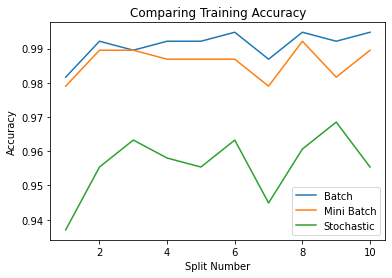

Learning Rate: 0.001


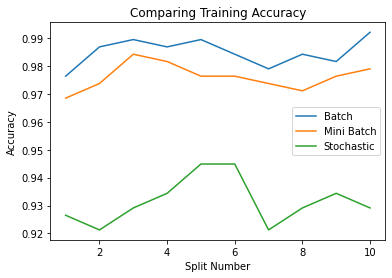

Learning Rate: 0.0001


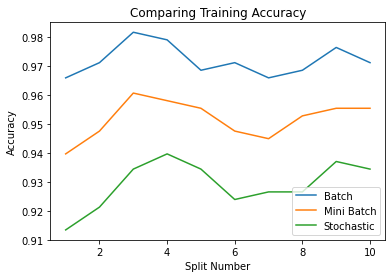

Threshold: 0.3
Learning Rate: 0.01


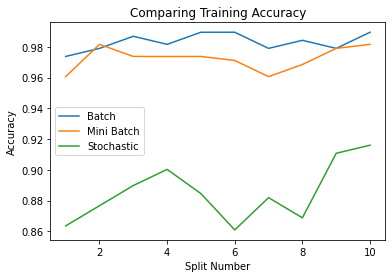

Learning Rate: 0.001


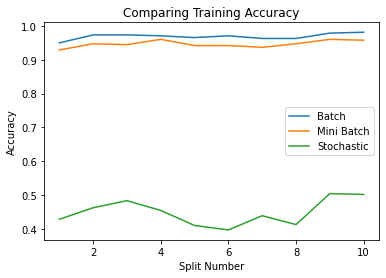

Learning Rate: 0.0001


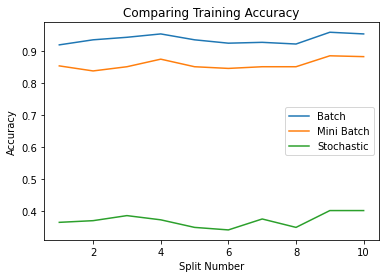

Threshold: 0.4
Learning Rate: 0.01


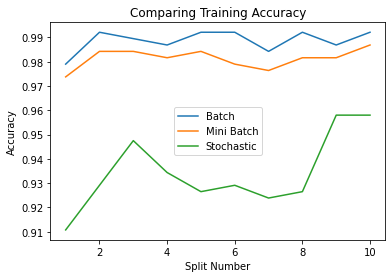

Learning Rate: 0.001


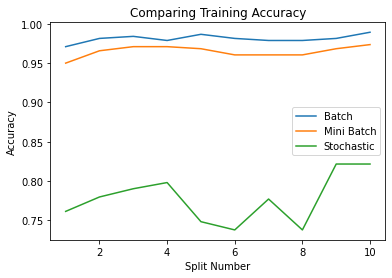

Learning Rate: 0.0001


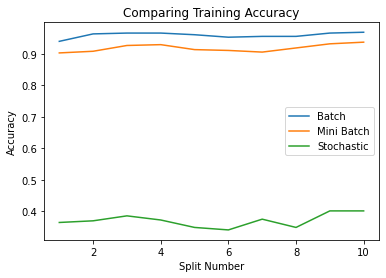

Threshold: 0.6
Learning Rate: 0.01


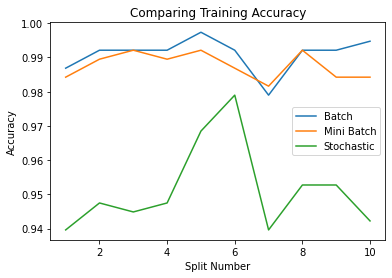

Learning Rate: 0.001


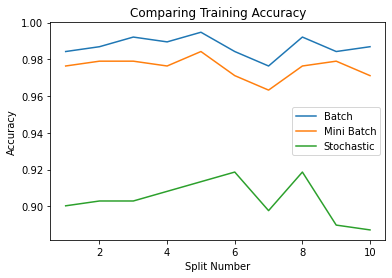

Learning Rate: 0.0001


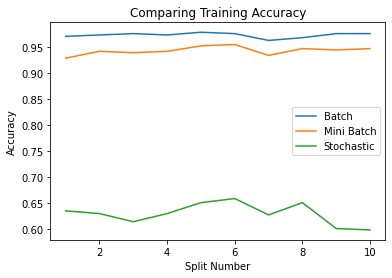

Threshold: 0.7
Learning Rate: 0.01


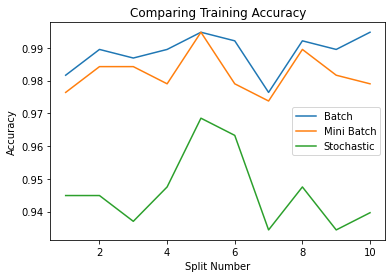

Learning Rate: 0.001


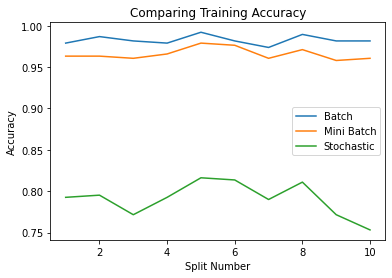

Learning Rate: 0.0001


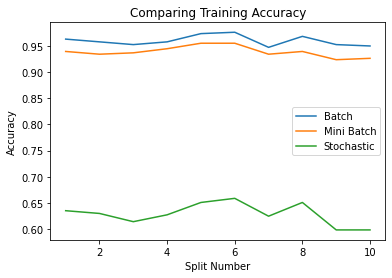

In [3138]:
for threshold in thresholds:
    print(f"Threshold: {threshold}")
    for learning_rate in learning_rates:
        print(f"Learning Rate: {learning_rate}")
        plot_graph("Comparing Training Accuracy", "Split Number", "Accuracy", [LR2_batch_training_accuracy[(threshold, learning_rate)], LR2_mini_batch_training_accuracy[(threshold, learning_rate)], LR2_stochastic_training_accuracy[(threshold, learning_rate)]], ["Batch", "Mini Batch", "Stochastic"], x_axis_value)

Threshold: 0.5
Learning Rate: 0.01


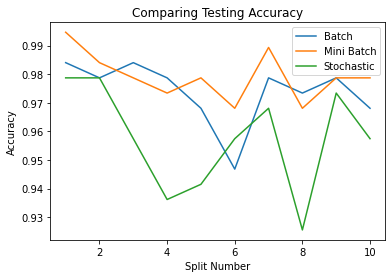

Learning Rate: 0.001


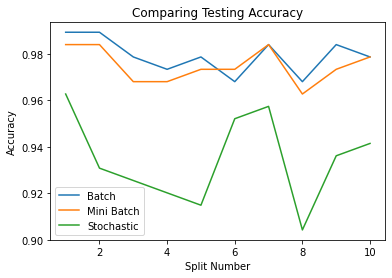

Learning Rate: 0.0001


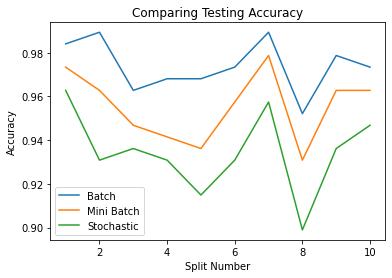

Threshold: 0.3
Learning Rate: 0.01


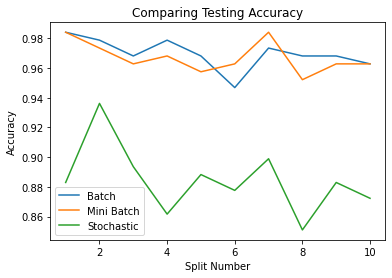

Learning Rate: 0.001


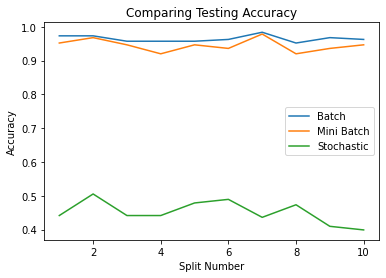

Learning Rate: 0.0001


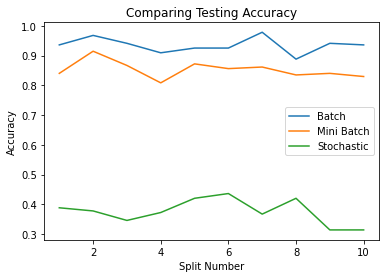

Threshold: 0.4
Learning Rate: 0.01


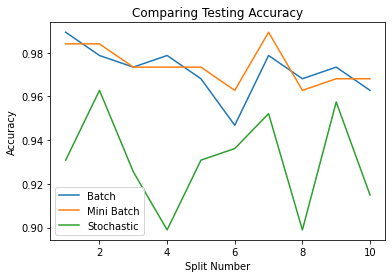

Learning Rate: 0.001


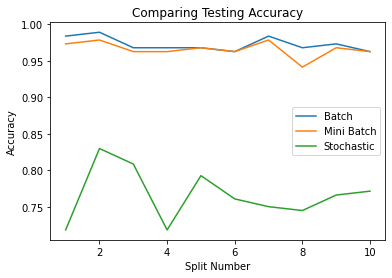

Learning Rate: 0.0001


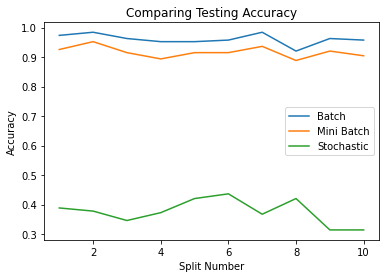

Threshold: 0.6
Learning Rate: 0.01


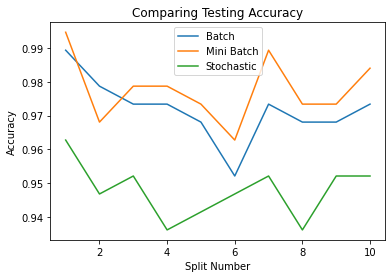

Learning Rate: 0.001


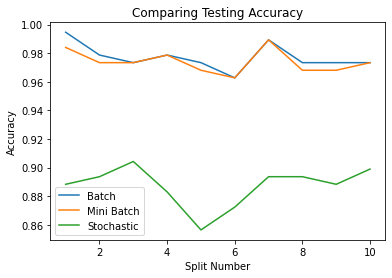

Learning Rate: 0.0001


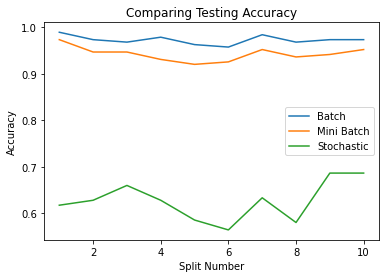

Threshold: 0.7
Learning Rate: 0.01


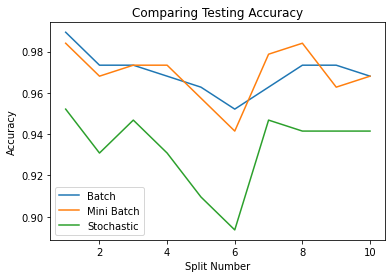

Learning Rate: 0.001


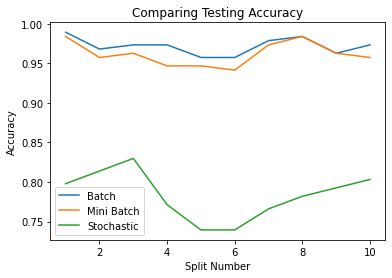

Learning Rate: 0.0001


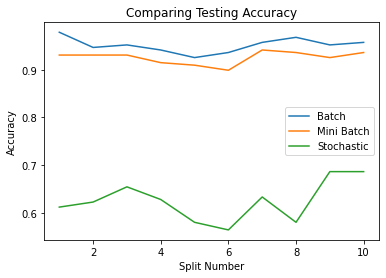

In [3139]:
for threshold in thresholds:
    print(f"Threshold: {threshold}")
    for learning_rate in learning_rates:
        print(f"Learning Rate: {learning_rate}")
        plot_graph("Comparing Testing Accuracy", "Split Number", "Accuracy", [LR2_batch_testing_accuracy[(threshold, learning_rate)], LR2_mini_batch_testing_accuracy[(threshold, learning_rate)], LR2_stochastic_testing_accuracy[(threshold, learning_rate)]], ["Batch", "Mini Batch", "Stochastic"], x_axis_value)

### Part D – Comparative Study

#### Learning Task 1
Perform a comparative study of models PM1, PM3, PM4, FLDM1, FLDM2, LR1 and LR2. The average performance metrics of 10 random training and testing splits should be considered for this comparative study. Find out the best performing model and if possible explain the reasons for that model to outcast other models.

In [3157]:
models = ["PM1", "PM2", "PM3", "PM4", "FLDM1", "FLDM2", "LR1", "LR2"]

In [3158]:
average_accuracies = []

average_accuracies.append(np.mean(PM1_testing_accuracy))
average_accuracies.append(np.mean(PM2_testing_accuracy))
average_accuracies.append(np.mean(PM3_testing_accuracy))
average_accuracies.append(np.mean(PM4_testing_accuracy))
average_accuracies.append(np.mean(FLDM1_testing_accuracy))
average_accuracies.append(np.mean(FLDM2_testing_accuracy))

LR1_accuracies = []
LR2_accuracies = []

for threshold in thresholds:
    for learning_rate in learning_rates:
        LR1_accuracies.append(np.max([np.mean(LR1_batch_training_accuracy[(threshold, learning_rate)]) , np.mean(LR1_mini_batch_training_accuracy[(threshold, learning_rate)]) , np.mean(LR1_stochastic_training_accuracy[(threshold, learning_rate)])]))
        LR2_accuracies.append(np.max([np.mean(LR2_batch_training_accuracy[(threshold, learning_rate)]) , np.mean(LR2_mini_batch_training_accuracy[(threshold, learning_rate)]) , np.mean(LR2_stochastic_training_accuracy[(threshold, learning_rate)])]))

average_accuracies.append(np.mean(LR1_accuracies))
average_accuracies.append(np.mean(LR2_accuracies))

print(average_accuracies)

[0.8144951120421202, 0.8316884082705489, 0.9552578792469294, 0.8144951120421202, 0.9638575603264548, 0.9638575603264548, 0.8696384320246545, 0.9766404199475064]


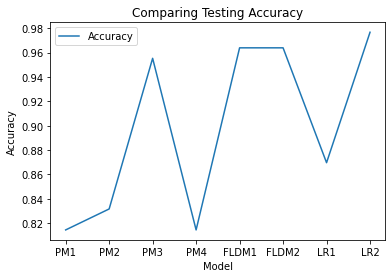

In [3159]:
plot_graph("Comparing Testing Accuracy", "Model", "Accuracy", [average_accuracies], ["Accuracy"], models)

In [3160]:
def return_recall(metrics):
    recall = [x[0] for x in metrics]
    return recall

def return_precision(metrics):
    precision = [x[1] for x in metrics]
    return precision

In [3161]:
average_recalls = []

average_recalls.append(np.mean(return_recall(PM1_testing_metrics)))
average_recalls.append(np.mean(return_recall(PM2_testing_metrics)))
average_recalls.append(np.mean(return_recall(PM3_testing_metrics)))
average_recalls.append(np.mean(return_recall(PM4_testing_metrics)))
average_recalls.append(np.mean(return_recall(FLDM1_testing_metrics)))
average_recalls.append(np.mean(return_recall(FLDM2_testing_metrics)))

LR1_recalls = []
LR2_recalls = []

for threshold in thresholds:
    for learning_rate in learning_rates:
        LR1_recalls.append(np.max([np.mean(return_recall(LR1_batch_training_metrics[(threshold, learning_rate)])) , np.mean(return_recall(LR1_mini_batch_training_metrics[(threshold, learning_rate)])) , np.mean(return_recall(LR1_stochastic_training_metrics[(threshold, learning_rate)]))]))
        LR2_recalls.append(np.max([np.mean(return_recall(LR2_batch_training_metrics[(threshold, learning_rate)])) , np.mean(return_recall(LR2_mini_batch_training_metrics[(threshold, learning_rate)])) , np.mean(return_recall(LR2_stochastic_training_metrics[(threshold, learning_rate)]))]))

average_recalls.append(np.mean(LR1_recalls))
average_recalls.append(np.mean(LR2_recalls))

print(average_recalls)

[0.7520951470971706, 0.8124876802721506, 0.9674556378687317, 0.7520951470971706, 0.9851552966424213, 0.9851552966424213, 0.8381453041742276, 0.9806762119191859]


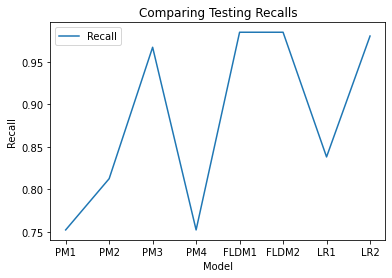

In [3162]:
plot_graph("Comparing Testing Recalls", "Model", "Recall", [average_recalls], ["Recall"], models)

In [3163]:
average_precisions = []

average_precisions.append(np.mean(return_precision(PM1_testing_metrics)))
average_precisions.append(np.mean(return_precision(PM2_testing_metrics)))
average_precisions.append(np.mean(return_precision(PM3_testing_metrics)))
average_precisions.append(np.mean(return_precision(PM4_testing_metrics)))
average_precisions.append(np.mean(return_precision(FLDM1_testing_metrics)))
average_precisions.append(np.mean(return_precision(FLDM2_testing_metrics)))

LR1_precisions = []
LR2_precisions = []

for threshold in thresholds:
    for learning_rate in learning_rates:
        LR1_precisions.append(np.max([np.mean(return_precision(LR1_batch_training_metrics[(threshold, learning_rate)])) , np.mean(return_precision(LR1_mini_batch_training_metrics[(threshold, learning_rate)])) , np.mean(return_precision(LR1_stochastic_training_metrics[(threshold, learning_rate)]))]))
        LR2_precisions.append(np.max([np.mean(return_precision(LR2_batch_training_metrics[(threshold, learning_rate)])) , np.mean(return_precision(LR2_mini_batch_training_metrics[(threshold, learning_rate)])) , np.mean(return_precision(LR2_stochastic_training_metrics[(threshold, learning_rate)]))]))

average_precisions.append(np.mean(LR1_precisions))
average_precisions.append(np.mean(LR2_precisions))

print(average_precisions)

[0.9471074548353917, 0.9215888557141703, 0.9598637387434064, 0.9471074548353917, 0.9574233797038681, 0.9574233797038681, 0.8732661211179931, 0.970383811505127]


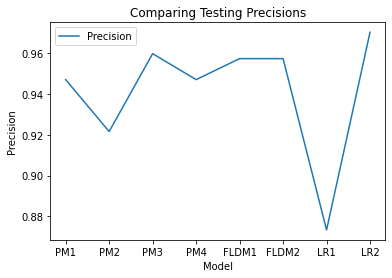

In [3164]:
plot_graph("Comparing Testing Precisions", "Model", "Precision", [average_precisions], ["Precision"], models)